# 2018-04-24 Econ 101b Take Home Exam

### Problem set will be due Th May 10 at 7 pm...

## Setting up the Python/Jupyter environment

In [ ]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

In [ ]:
# ABOVE CELL IS "NO SCROLLING SUBWINDOWS" SETUP
#
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [ ]:
# THIS CELL IS THE KEY TO THE OKPY.ORG AUTOGRADER SYSTEM
#
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.

!pip install -U okpy

from client.api.notebook import Notebook

ok = Notebook('ps13.ok')
_ = ok.auth(force=True, inline=True)

### ⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎
### RUN THESE CELLS ABOVE FIRST

# Take Home Exam (Due Th May 10 06:59:59 PM)

----

&nbsp;

**Task 5: The Effects of a Jump in the Savings Rate**:

Do calculations and assign the appropriate values to the variables in the code cells below:

In [ ]:
# when α = 0.15, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles
# as a number: doubling is 2, tripling is 3:

KY_when_s_doubles_pointfifteen = ___

In [ ]:
ok.grade('q03')

In [ ]:
# when α = 0.30, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointthirty = ___

In [ ]:
# when α = 0.45, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointfortyfive = ___

In [ ]:
# when α = 0.60, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointsixty = ___

In [ ]:
# when α = 0.75, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointseventyfive = ___

In [ ]:
# when α = 0.90, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointninety = ___

In [ ]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN SIMULATIONS
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its initial
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the initial and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...

def sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_initial_Output',
        'BGP_initial_Output_per_Worker',
        'BGP_initial_Capital_Output_Ratio',
        'BGP_initial_Capital',
        'BGP_final_Output',
        'BGP_final_Output_per_Worker',
        'BGP_final_Capital_Output_Ratio',
        'BGP_final_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    KoverY_initial_steady_state = s/(n+g+delta)
    YoverL_initial_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_initial_steady_state = (YoverL_initial_steady_state *
        KoverY_initial_steady_state)
    sg_df.Capital[0] = KoverL_initial_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_initial_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_initial_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_initial_Output[0] = sg_df.BGP_initial_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_initial_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    
    sg_df.BGP_final_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_final_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_final_Output[0] = sg_df.BGP_final_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_final_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    

    for i in range(T):
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])
        
        sg_df.BGP_initial_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_initial_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_initial_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_initial_Output[i+1] = (sg_df.BGP_initial_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_initial_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
        sg_df.BGP_final_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_final_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_final_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_final_Output[i+1] = (sg_df.BGP_final_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_final_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")
    plt.ylim(0, )

    ax2 = plt.subplot(3,2,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(3,2,3)
    sg_df.BGP_initial_Capital.plot(ax = ax3, title = "BGP (Initial) Capital Stock")
    sg_df.BGP_final_Capital.plot(ax = ax3, title = "BGP (Final) Capital Stock")
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax4 = plt.subplot(3,2,4)
    sg_df.BGP_initial_Output.plot(ax = ax4, title = "BGP (Initial) Output")
    sg_df.BGP_final_Output.plot(ax = ax4, title = "BGP (Final) Output")
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylim(0, )

    ax5 = plt.subplot(3,2,5)
    sg_df.BGP_initial_Output_per_Worker.plot(ax = ax5, title = "BGP (Initial) Output per Worker")
    sg_df.BGP_final_Output_per_Worker.plot(ax = ax5, title = "BGP (Final) Output per Worker")
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(3,2,6)
    sg_df.BGP_initial_Capital_Output_Ratio.plot(ax = ax6, 
        title = "BGP (Initial) Capital-Output Ratio")
    sg_df.BGP_final_Capital_Output_Ratio.plot(ax = ax6, 
        title = "BGP (Final) Capital-Output Ratio")
    sg_df.Capital_Output_Ratio.plot(ax = ax6, 
        title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n + Delta_n, "is the labor force growth rate")
    print(g + Delta_g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s + Delta_s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")

**(Task C): Different Values of the Production Function Parameter $\alpha$**

Still working with our two simulation functions:

    sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24,
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)
    
and:

    log_sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)
    
Insert code cells immediately below to calculate—logs and levels—the effect in the Solow growth model, starting from our default base case balanced growth path, of a permanent six percentage point increase in the savings-investment rate s for five different values of the production function curvature parameter alpha ($\alpha$): 1/4, 1/3, 1/2, 2/3, and 3/4. 

Also calculate the values of log(K/Y) in the 50th year of the simulation for each of your  simulations. In the subsequent code cell "Task C answer variables" set the variables equal to their values in your five respective simulation runs.

In the subsequent markdown cell "Task C Answer Discussion", write two paragraphs about what these simulation runs tell you about the differences between economies in which diminishing returns to scale set in quickly (alpha low, near zero), and economies in which diminishing returns set in slowly because capital has a high weight share in the production function (alpha high, near one):

----

**(Task D) Zero Population Growth**

Many observers project that by the end of the twenty-first century the population of the United States will be stable. Using the Solow growth model, what would such a downward shift in the growth rate of the labor force do to the growth of output per worker and to the growth of total output if zero labor force growth came suddenly and permanently in 2050? Consider both the effect on the balanced-growth equilibrium path and the transition from the “old” positive population growth to the “new” zero population growth balanced-growth path.

Answer this question by setting the appropriate variables to their values in the code cell below. The initial balanced growth path steady state of the economy has:

* Rate of population growth n = 1% per year
* Rate of efficiency-of-labor growth g = 1.5% per year
* Depreciation rate $ \delta $ (delta) = 3% per year
* Savings-investment effort as a share of output s = 22% per year
* Diminishing returns to investment production function parameter $ \alpha $ (alpha) = 0.5
* Level of the efficiency of labor today $ E_{2018} = 65000 $

**(Task F) Long Run Human Populations: Levels and Growth**

Run the code cell below, unchanged, to enter Michael Kremer's data—his estimates of human population and its growth, updated to 2015, into the pandas dataframe "Pop_df". Then proceed to do the tasks in the markdown cells further down:

In [ ]:
# Task C answer variables

KoverY_50_alphaquarter = __ # In the simulation run boosting the savings rate 
                            # with alpha=0.25, the value of the capital output
                            # ratio in the 50th year goes here

KoverY_50_alphathird = __ # In the simulation run boosting the savings rate 
                          # with alpha=1/3, the value of the capital output
                          # ratio in the 50th year goes here

KoverY_50_alphahalf = __ # In the simulation run boosting the savings rate 
                         # with alpha=0.5, the value of the capital output
                         # ratio in the 50th year goes here

KoverY_50_alphatwothirds = __ # In the simulation run boosting the savings rate 
                              # with alpha=2/3, the value of the capital output
                              # ratio in the 50th year goes here
        
KoverY_50_alphathreequarters = __ # In the simulation run boosting the savings rate 
                                  # with alpha=3/4, the value of the capital output
                                  # ratio in the 50th year goes here


In [7]:
# HUMAN POPULATION OVER THE LAST 10000 YEARS
#
# make sure the standard libraries are active

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

Population = (
    [-8000,5],
    [-4000, 7],
    [-2000, 27],
    [-1000, 50],
    [-500, 100],
    [-200, 150],
    [0, 170],
    [200, 190],
    [400, 190],
    [600, 200],
    [800, 230],
    [1000, 265],
    [1200, 360],
    [1400, 350],
    [1500, 425],
    [1600, 545],
    [1700, 610],
    [1750, 720],
    [1800, 900],
    [1850, 1200],
    [1875, 1325],
    [1900, 1625],
    [1925, 1875],
    [1950, 2516],
    [1975, 4000],
    [2000, 6100],
    [2015, 7250])

In [8]:
Population = np.array(Population)

In [9]:
Pop_df = pd.DataFrame(Population) 

In [10]:
Pop_df.columns = ['Date', 'Population']

In [11]:
Pop_df['Year'] = 0.0

for i in range(26):
    Pop_df.Year[i] = Pop_df.Date[i]
    

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
Pop_df = Pop_df.set_index('Date')

Now let us compare growth rates of human populations across different time periods. Set the variables in the code cell below to their appropriate values:

In [ ]:
Growth_Rate_1000BC_to_1000AD =
Growth_Rate_1400_to_1600 =
Growth_Rate_1900_to_1950 =

In [ ]:
ok.grade('q03')

Now suppose that we are in a Malthusian population régime, in which the rate of population growth is linearly proportional to the relative deviation of typical standards of living from 750 dollars a year, with population growth at zero when output per capita is 750 dollars per year and 1 percent per year when output per worker is 1500. What would you think typical standards of living were in the 1400 to 1600 period and the in the 1900 to 1950 period? Enter the appropriate values for the variables in the code cell below:

**(Task C) Cross-Country Productivity Differences I**

Consider a Solow growth model economy with a capital accumulation rate that depends on the relative price of capital goods $ p_k $, because a lower price of capital goods means that a similar amount of savings sY will translate into more investment in capital, thus:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d\left(ln(K)\right)}{dt} = 
\left(\frac{s}{p_k}\right)\left(\frac{Y}{K}\right) - \delta $

in which the relative price of capital goods is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ p_k = \left(\frac{Y}{L}\right)^{-\eta} $

with $ \eta $ being the Greek letter called "eta".

The steady-state balanced-growth path capital-output ratio would then be:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{K}{Y}\right)^* =
\frac{s/p_k}{n+g+\delta} $

and output per worker along the steady-state balanced-growth path would then be:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right)^* =
\left(\frac{s/p_k}{n+g+\delta}\right)
^{\frac{\alpha}{1-\alpha}}
E $

In this environment—in which high levels of the effiency of labor and output per worker carry with them a reduction in the relative price of capital goods—we seek to analyze what difference this dependence of the price of capita on prosperity makes. For this question, assume further that the economy's capital-output ratio and output per worker level is on its balanced growth path. And assume for this Task that the current level of the efficiency of labor E is equal to 1.

----

(1) Let the savings rate s=18%, the labor force growth rate n = 1% per year, the labor efficiency growth rate g = 2% per year, the depreciation rate $ \delta $ = 3% per year, and the production function parameter $ \alpha $ = 1/2.

(a) what is current balanced-growth path output per worker if $ \eta = 0 $? Set the variable YoLbg20 equal to your answer in the Code Cell for Answers for Task (C) below.

(b) what is current balanced-growth path output per worker if $ \eta = 0.1 $? Set the variable YoLbg21 equal to your answer in the Code Cell for Answers for Task (C) below.

(c) what is current balanced-growth path output per worker if $ \eta = 0.2 $? Set the variable YoLbg22 equal to your answer in the Code Cell for Answers for Task (C) below.

(d) what is current balanced-growth path output per worker if $ \eta = 0.3 $? Set the variable YoLbg23 equal to your answer in the Code Cell for Answers for Task (C) below.

(e) what is current balanced-growth path output per worker if $ \eta = 0.4 $? Set the variable YoLbg24 equal to your answer in the Code Cell for Answers for Task (C) below.

(f) what is current balanced-growth path output per worker if $ \eta = 0.5 $? Set the variable YoLbg25 equal to your answer in the Code Cell for Answers for Task (C) below.

----

(2) Let the savings rate s=18%, the labor force growth rate n = 1% per year, the labor efficiency growth rate g = 2% per year, the depreciation rate $ \delta $ = 3% per year, and the production function parameter $ \alpha $ = 3/4.

(a) what is current balanced-growth path output per worker if $ \eta = 0 $? Set the variable YoLbg30 equal to your answer in the Code Cell for Answers for Task (C) below.

(b) what is current balanced-growth path output per worker if $ \eta = 0.1 $? Set the variable YoLbg31 equal to your answer in the Code Cell for Answers for Task (C) below.

(c) what is current balanced-growth path output per worker if $ \eta = 0.2 $? Set the variable YoLbg32 equal to your answer in the Code Cell for Answers for Task (C) below.

----

(3) Is this method—take the Solow model balanced growth path and assume that the economy is going to be on it—a reasonable way to proceed in analyzing the question of how much difference an association of prosperity with low capital goods prices make? How might it lead to wrong conclusions? How would you test whether thoe conclusions are wrong? Write your answer in the Markdown Cell for Answers to Task C below.

In [ ]:
# Code Cell for Answers for Task C

YoLbg20 =   # (1)(a)
YoLbg21 =   # (1)(b)
YoLbg22 =   # (1)(c)
YoLbg23 =   # (1)(d)
YoLbg24 =   # (1)(e)
YoLbg25 =   # (1)(f)

YoLbg30 =   # (1)(a)
YoLbg31 =   # (1)(b)
YoLbg32 =   # (1)(c)

### Markdown Cell for Answer to Task C(3)

&nbsp;

ANSWER:<font color="blue"> </font>

### (Task C) The Effects of an Increase in the Government Deficit at Full Employment 1

Let's calculate the effects of a 500 billion dollar increase in the annual deficit produced by expanded government spending on the state of the economy. 

1. In the code cell below, write code to increase the government purchases variable G from 4 to 4.5.

2. Write code to calculate private savings S_p, government savings S_g, foreign savings S_f, and the variable GAP0, what the gap between investment spending and total savings would be if that were to be the only change in the economy.

3. Print out this initial round-zero GAP0 variable. Examine it

The economy is no longer at its equilibrium. The government is draining savings out of the flow of funds, leaving an excess demand for finance to pay for business investment spending. The economy will adjust—the real interest rate will rise.

In [ ]:
# Raise government purchases, and calculate the
# savings-investment gap

G_ini = 4
G = G_ini + 0.5
T = t * Y

S_g = 
S_f = 
S_p = 

GAP0 = I - (S_p + S_g + S_f)

In [ ]:
import numpy as np
ok.grade('q02')

### (Task D) The Effects of an Increase in the Government Deficit at Full Employment 2

Suppose that in response to this disequilibrium in the flow-of-funds market created by Task C, r by would increase by 1/10 of this GAP0. 

1. Adjust r upward by 1/20 of this GAP0.
2. Write code to calculate what now private savings S_p, government savings S_g, foreign savings S_f, and the variable GAP1 are.
3. Print out this initial round-zero GAP1 variable. Examine it. Is the economy back at equilibrium? Set the variable at_equilibrium to True or False

In [ ]:
r_o = 0
r = r_o + 0.05 * GAP0

I = 
eps = 
GX = 
IM = 
NX = 

S_g = 
S_f = 
S_p = 

GAP1 = I - (S_p + S_g + S_f)
print(GAP1)

at_equilibrium = 

In [ ]:
import numpy as np
ok.grade('q03')

### (Task E) The Effects of an Increase in the Government Deficit at Full Employment 3

If the economy was not in equilibrium at the end of (Task D), in the code cell below calculate the new equilibrium. In any event, print out and examine consumption spending C, investment spending I, gross exports GX, imports IM, net exports NX, the real interest rate r, and the exchange rate $ \epsilon $. 

In the markdown cell further below, explain why the effects of this unfunded increase in government purchases are what they are.

In [ ]:
# add your code below here...

Explanation: <font color='blue'>ANSWER: ___ </font>

In [ ]:
SoLtypical1400to1600 =
SoLtypical1900to1950 =

### The Baseline Sticky-Price Model

Start with the IS-Curve for the sticky-price model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Remember: causation moves from right to left: the components of spending add up to aggregate demand or total expenditure E, and the inventory adjustment process then drives national income and product Y to aggregate demand.

The symbols on the right-hand side of this equation are grouped into:

_Expectations and Confidence:_

* $ c_o $ :: consumer confidence
* $ I_o $ :: business investment animal spirits
* $ {\epsilon_o} $ :: the confidence of foreign exchange speculators in the value of foreign currency

&nbsp;

_Behavioral Parameters:_

* $ x_{f} $ :: the responsiveness of exports to foreign income
* $ x_{\epsilon} $ :: the responsiveness of exports to the exchange rate
* $ {\epsilon_r} $ :: the responsiveness of the exchange rate to the interest rate
* $ I_r $ :: the responsiveness of investment to the interest rate
* $ {\mu} = \frac{1}{1- c_{y}(1-t) + im_y} $ :: the multiplier, itself a function of:
    * $ t $ :: the tax rate
    * $ c_y $ :: the marginal propensity to consume
    * $ im_y $ :: the marginal propensity to import

&nbsp;

_The Global Economic Environment:_

* $ Y^f $ :: foreign national income
* $ r^f $ :: the foreign long-term risky real interest rate

&nbsp;

_Policy Choices:_

* $ G $ :: government purchases
* $ r = i + \rho - \pi $ :: the long-term risky real interest rate, which itself will later on be a function of:
    * $ i $ :: the short-term safe nominal interest rate, a policy choice
    * $ \rho $ :: the risk (and term) premium charged for lending long-term to companies that might go bankrupt rather than short-term to the government
    * $ \pi $ :: the expected inflation rate

Assume parameter values:

* $ c_o = 2 $
* $ c_y = 5/8 $
* $ I_o = 4.4 $
* $ I_r = 10 $
* $ t = 0.20 $
* $ im_y = 1/6 $
* $ x^f = 0.1 $
* $ Y^f = 20 $
* $ r^f = 0.04 $
* $ x_{\epsilon} = 4/3 $
* $ \epsilon_o = 1 $
* $ \epsilon_r = 5 $

And assume that government purchases $ G = 4 $

The code cell below sets parameter values and calculates the equilibrium value of the real interest rater r for this flexprice model IS Curve. It then calculates the values of hte other economic variables, in trillions:

----

&nbsp;

In [ ]:
# STICKY-PRICE MODEL INITIAL SCENARIO SETUP

# Set initial parameter and variable values
c_o = 2
c_y = 5/8

I_o = 4.4
I_r = 10

G = 4
t = 0.20

im_y = 1/6
x_f = 0.1
Y_f = 20
r_f = 0.04

x_epsilon = 4/3
epsilon_o = 1
epsilon_r = 5

# Calculate the value of the multiplier
mu = 1/(1-c_y*(1-t)+ im_y)

# Set the real interest rate
r = 0.04

# Calculate the equilibrium value of Y from the IS Curve
Y = mu * ((c_o + I_o + G) + 
    (x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * r_f) -
    (I_r + x_epsilon * epsilon_r)* r) 

# calculcate the values of other economic variables 
# in this initial scenario
C = c_o + c_y * (1-t) * Y
I = I_o - I_r * r
GX = x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * (r_f-r)
IM = im_y * Y
NX = GX - IM
epsilon = epsilon_o + epsilon_r * (r_f-r)

# print out the values of economic variables in 
# this initial scenario equilibrium
print("The real interest rate =", r)
print("")
print("The components of national income and product Y are:")
print("Consumption spending C = ", C)
print("Investment spending I = ", I)
print("Government purchases G = ", G)
print("Net exports NX = ", NX)
print("")
print("Output Y = ", Y)
print("")
print("Gross exports GX = ", GX)
print("Imports IM = ", IM)
print("")
print("The real exchange rate ε = ", epsilon)
print("")
print("The multiplier μ = ", mu)

# AFTER YOU RUN THIS CELL, DO NOT OVERWRITE THE VALUES OF THE
# _ini VARIABLES!
#
# remember the values of the economic variables in this 
# initial scenario
r_ini = r
I_ini = I
G_ini = G
NX_ini = NX
epsilon_ini = epsilon
Y_ini = Y
C_ini = C

### (Task B) Sticky-Price: Moving Along the IS Curve: A Contraction via Higher Interest Rates to Fight Inflation (Initial)

In the code cell below the setup cell, calculate the change in national product produced by the central bank's fighting infltiton via a 4 percentage point increase in the domestic interest rate $ {\Delta}r = +0.04 $, holding constant the domestic real interest rate r, and set the value of the variable:

    Delta_Y_PS12taskB
    
to that calculated change:

In [ ]:
# CODE CELL FOR TASK B INITIAL

# Delta_r = +0.04

# ...
# ...
# ...
# ...

# Delta_Y_PS12taskB = 

### (Task B) Sticky-Price: Moving Along the IS Curve: A Contraction via Higher Interest Rates to Fight Inflation (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_C_PS12taskB
    Delta_I_PS12taskB
    Delta_G_PS12taskB
    Delta_NX_PS12taskB
    Delta_epsilon_PS12taskB
    Delta_r_PS12taskB =
    
to the changes in their values in the alternative scenario relative to the baseline

In [ ]:
# CODE CELL FOR TASK B CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_C_PS12taskB =
# Delta_I_PS12taskB = 
# Delta_G_PS12taskB = 
# Delta_NX_PS12taskB = 
# Delta_epsilon_PS12taskB =
# Delta_r_PS12taskB =

In [ ]:
# TASK B ANSWER CHECK

import numpy as np
ok.grade('q01')

### (Task B) Sticky-Price: Moving Along the IS Curve: A Contraction via Tighter Monetary Policy and Higher Interest Rates Abroad (Conclusion)

If everything worked out as it should, you would have identified the portions of the sticky-price IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to an increase $ {\Delta}r $ in the domestic real interest rate. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}Y = {\Delta}E = - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

And from them—and the parameter values—you could calculate by hand the changes in other economic variables.

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ r : {\Delta}r = +0.04 $, and compared the results...

What you should have found would be that contractionary monetary policy at home is, indeed, contrationary at home. As the domestic interest rates go up, investment falls. In addition, foreign currency becomes less valuable. As foreign currency becomes less valuable, domestic currency and thus domestically produced goods denominated in domestic currency become less attractive to foreign buyers. Thus gross exports fall as well.

In addition, you would have found the standard Keynesian multiplier result: When national income and product Y is demand determined, as in the sticky price model, there is a multiplied effect of any change in autonomous spending on Y. The multiplier comes from the positive feedback channel by which lower national income Y induces lower consumption spending C. The multiplier effect is partially damped because some of the negative impact on consumption spending "leaks" abroad in the form of lower imports.

----

&nbsp;

### (Task C) The Phillips Curve and Adaptive Expectations (Initial)

Now let us switch gears. The IS Curve framework determines the level of real national income and product Y as a function of the economic environment and of economic policy—fiscal policy as measured by the tax rate t and the level of government purchases G, and monetary policy as measured by the (imperfectly controlled) long-term real risky interest rate r.

Now let us move on to Okun's Law: Whether output Y is above or below potential output Y<sup>*</sup> determines whether unemployment u is above or below the NAIRU or "natural" rate of unemployment u<sup>*</sup> with an Okun's Law coefficient of about 2: a one percentage point deviation of unemployment from its NAIRU accompanies a 2 percent deviation of output from potential in the opposite direction:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{{Y_t}^* - {Y_t}}{{Y_t}^*} = 2(u_t - {u_t}^*) $

Now let us move on to the Phillips Curve: Whether unemployment is above or below its NAIRU then determines (with enormous amounts of noise and disturbances) whether infation will come in below or above the economy's expectations of what inflation will be.

Algebraically, Phillips curve tells us that inflation $ \pi $ in year t is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a upply shock term.

Expected inflation can take on many different forms, where we write $ E_{t-1}(X_t) $ to stand for the average _expectation_ in the economy of what an economic price or quantity X will be at time t:

* Static: $ {{\pi}_t}^e = {\pi}^* $
* Adaptive: $ {{\pi}_t}^e = {\pi}_{t-1} $
* Rational: $ {{\pi}_t}^e = E_{t-1}\left({\pi}_t\right) $
* Hybrid—a mixture of static and adaptive: $ {{\pi}_t}^e = {\lambda}{\pi}_{t-1} + (1-\lambda){\pi}^* $
* Hybrid—a mixture of adaptive and rational: $ {{\pi}_t}^e = {\lambda}E_{t-1}\left({\pi}_t\right) + (1-\lambda){\pi}_{t-1} $

Suppose inflation in year 0 is 12% per year—0.10. Suppose the parameters of the Phillips Curve are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{3} $   

And suppose that there are no supply shocks.

Suppose further that inflation expectations are adaptive, with:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}^* = 0.02 $

And suppose that the Federal Reserve, via contractionary monetary policy, raises the unemployment rate to 9%—0.09—in year 1 and keeps it there in years 2 through 10.

In the code cell below, calculate the values of inflation in years 1 through 10 and set the variables:

    pi_year1_PS12taskC
    pi_year2_PS12taskC
    pi_year3_PS12taskC
    pi_year4_PS12taskC
    pi_year5_PS12taskC
    pi_year6_PS12taskC
    pi_year7_PS12taskC
    pi_year8_PS12taskC
    pi_year9_PS12taskC
    pi_year10_PS12taskC
    
to the appropriate calculated values:

In [ ]:
# CODE CELL FOR TASK C INITIAL

# pi_zero = 0.12 

# ...
# ...
# ...
# ...

# pi_year1_PS12taskC =
# pi_year2_PS12taskC =
# pi_year3_PS12taskC =
# pi_year4_PS12taskC =
# pi_year5_PS12taskC =
# pi_year6_PS12taskC =
# pi_year7_PS12taskC = 
# pi_year8_PS12taskC =
# pi_year9_PS12taskC =
# pi_year10_PS12taskC = 

In [ ]:
# TASK C ANSWER CHECK

import numpy as np
ok.grade('q02')

### (Task C)  The Phillips Curve and Adaptive Expectations (Conclusion)

If everything went well, you should have found that inflation is always 3%. And over the decade the economy gains enormous dividends in terms of extra production and extra jobs. And then—as long as expectations remain static—the central bank could return the unemployment rate to 6% in year 11, and inflation would drop down to 2%, with no permanent harm done.

Of course, that is not the way we think that it works. That is not how the experience of the 1970s leads us to think that it would work.

----

&nbsp;

### (Task D) The Phillips Curve and Hybrid Expectations (Initial)

Take the Phillips Curve in year t:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a supply shock term.

And assume expected inflation is somewhat rational and somewhat adaptive. That is, for some parameter $ \lambda $:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = \lambda\pi_t + (1 - \lambda){\pi}_{t-1} $

Suppose inflation in year 0 is -2% per year: -0.02. Suppose the parameters of the Phillips Curve are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{2} $   

And suppose that there are no supply shocks.

Suppose that in year zero—when expectations for $ {\pi_1}^e $, expectations for what inflation will be in year one, are set—the Federal Reserve announces that it will, via expansionary monetary policy, drops the unemployment rate to 4%—0.04—in year 1 and keeps it there in years 2 through 10.

Suppose further that $ \lambda = 0.75 $.

In the code cell below, calculate the values of inflation in years 1 through 10 and set the variables:

    pi_year1_PS12taskD
    pi_year2_PS12taskD
    pi_year3_PS12taskD
    pi_year4_PS12taskD
    pi_year5_PS12taskD
    pi_year6_PS12taskD
    pi_year7_PS12taskD
    pi_year8_PS12taskD
    pi_year9_PS12taskD
    pi_year10_PS12taskD
    
to the appropriate calculated values:

In [ ]:
# CODE CELL FOR TASK D INITIAL

# pi_0 = -0.02
#  

# ...
# ...
# ...
# ...

# pi_year1_PS12taskD =
# pi_year2_PS12taskD =
# pi_year3_PS12taskD =
# pi_year4_PS12taskD =
# pi_year5_PS12taskD =
# pi_year6_PS12taskD =
# pi_year7_PS12taskD =
# pi_year8_PS12taskD =
# pi_year9_PS12taskD =
# pi_year10_PS12taskD = 

In [ ]:
# TASK D ANSWER CHECK

import numpy as np
ok.grade('q03')

### (Task D): The Phillips Curve and Hybrid Expectations (Final)

If everything worked out well, you would have found that each year inflation jumps not by:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ - \beta (u - u^*) = -\left(\frac{1}{2}\right)(0.04 - 0.06) = 0.01 $ 

but rather by:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ - \frac{\beta (u - u^*)}{1 - \lambda} = \frac{-\left(\frac{1}{2}\right)(0.04 - 0.06) = 0.01}{1-0.75} = +0.04 $

Why? Because three-quarters of inflation expectations are formed not in a backward but a forward looking manner: people take account of the fact that inflation is rising in forming their expectations, and then take account of the fact that people are taking account of the fact that inflation is rising, and then take account of the fact that people are taking account of the fact that people are taking account of the fact that inflation is rising, and so forth...

It was the worry about this dynamic that led Paul Volcker back in the day, back at the end of the 1970s and beginning of the 1980s, to make controlling inflation job #1 at whatever cost in terms of a deep recession it generated. Dealing with inflation and unemployment when inflation was adaptive—when every upward kick in inflation from a supply shock get permanently incorporated into next year's inflation rate—was annoying. But should inflation expectations become substantially "rational" than the situation would become even less controllable.

----

&nbsp;

### Monetary Policy Reactions Setup

Now let's switch gears again. Recall our Phillips Curve:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a upply shock term.

Expected inflation can take on many different forms, where we write $ E_{t-1}(X_t) $ to stand for the average _expectation_ in the economy of what an economic price or quantity X will be at time t:

* Static: $ {{\pi}_t}^e = {\pi}^* $
* Adaptive: $ {{\pi}_t}^e = {\pi}_{t-1} $
* Rational: $ {{\pi}_t}^e = E_{t-1}\left({\pi}_t\right) $
* Hybrid—a mixture of static and adaptive: $ {{\pi}_t}^e = {\lambda}{\pi}_{t-1} + (1-\lambda){\pi}^* $
* Hybrid—a mixture of adaptive and rational: $ {{\pi}_t}^e = {\lambda}E_{t-1}\left({\pi}_t\right) + (1-\lambda){\pi}_{t-1} $

Now we add to our Phillips Curve a Monetary Policy Reaction Function. First, the central bank will (attempt to) set the real risky long-term interest rate r to "lean against the wind" given its target for inflation and its estimate of what the NAIRU is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ r_t = r^{**} + r_\pi(\pi_t - \pi^T) - r_u(u_t - u^{**}) $

where:

* $ r_t $ is the real risky long-term interest rate
* $ r^{**} $ is the central bank's belief about what the "neutral" interest rate $ r^* $ is, at which unemployment will be equal to the natural rate and production equal to potential output
* $ r_\pi $ is how much the central bank reacts via raising interest rates to a deviation of inflation from the central bank's target
* $ \pi^T $ is the central bank's inflation target
* $ r_u $ is how much the central bank reacts by raising interest rates to a downward deviation of unemployment from its belief about the natural rate
* $ u^{**} $ is the central bank's belief about the natural rate

Note that the central bank's belief about the natural rate $ u^{**} $ may be different from the true NAIRU or natural rate $ u^* $

Note that a level of $ r $ above or below the true "neutral" interest rate $ r^* $ leads to a depression or boom via the IS Curve mechanism:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y - Y^{*} = -\mu\left(I_r + x_{\epsilon}{\epsilon}_r\right)(r - r^*) $

And from Okun's Law:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y - Y^{*}}{Y*} = - 2(u - u^*) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u - u{*} = \left(\frac{\mu\left(I_r + x_{\epsilon}{\epsilon}_r\right)}{2}\right) (r - r^*) $

Let's call this responsiveness of unemployment $ u $ to the long-term risky real interest rate $ r $ by the Greek letter $ \phi $ (phi):

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \phi = \frac{\mu\left(I_r + x_{\epsilon}{\epsilon}_r\right)}{2} $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u - u^{*} = {\phi}(r - r^*) $

Combine the responsiveness of unemployment to the interest rate with the central bank's monetary policy rule to get the reaction function:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u - u^{*} = {\phi}(r^{**} + r_\pi(\pi - \pi^T) - r_u(u - u^{**}) - r^*) $

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u - u^{*} = {\phi}r_\pi(\pi - \pi^T) - {\phi}r_u(u - u^{**}) + {\phi}(r^{**}-r^*) $

Since it takes time for shifts in the interest rate to affect the economy, add on time subscripts to reflect the fact that the unemployment outcome this year is on the right hand side while the variables on the left hand side are their values last year when the central bank was making its decisions:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u_t - u^{*} = {\phi}r_\pi(\pi_{t-1} - \pi^T) - {\phi}r_u(u_{t-1} - u^{**}) + {\phi}(r^{**}-r^*) $

Add on our Phillips Curvean equation for how expectations of inflation $ {{\pi}_t}^e $ are determined, and we have a system whose behavior can be investigated.

----

&nbsp;

### (Task E): Monetary Policy Reactions Under Static Expectations Initialization

Our system is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u_t - u^{*} = {\phi}r_\pi(\pi_{t-1} - \pi^T) - {\phi}r_u(u_{t-1} - u^{**}) + {\phi}(r^{**}-r^*) $ (Monetary Policy Reaction Function)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - u^{*}) $ (Phillips Curve)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = {\pi}^* $ (Static Inflation Expectations)

Let's start out with some parameter values and initial conditions:

The "Task E Initialization" code cell immediately below sets out a simple model that tracks this system, starting from initial conditions in year zero, through year 10. The "Task E Initialization" code cell has initial conditions:

* $ u_0 = 0.06 $ :: (u_0)
* $ {\pi^e}_0 = 0.02 $ :: (pie_0)
* $ \pi_0 = 0.02 $ :: (pi_0)

Run the initialization cell. In the code cell "Task E Initialization Check" further below, stuff the three time-series variables of the unemployment rate $ u $ (u), the expected inflation rate $ \pi^e $ (pie), and the inflation rate $ \pi $ into a dataframe. Plot the dataframe to make sure that the unemployment rate variable is constant at a value of 0.06 and that both expected and realized inflation are constant at a value of 0.02.

In [ ]:
# TASK E INITIALIZATION

u_star = 0.06
phi = 1
pi_T = 0.02
r_star = 0.05
beta = 1/2
pi_star = 0.02
r_pi = 0.5
r_u = 0.25

u_star2 = 0.06
r_star2 = 0.05


# Initial conditions

u_0 = 0.06
pie_0 = 0.02
pi_0 = 0.02


# Run the model

u = [u_0]
pie = [pie_0]
pi = [pi_0]

for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pie = pie + [pi_star]
    pi = pi + [pie[t] - beta*(u[t]-u_star)]
             

In [ ]:
# TASK E INITIALIZATION CHECK CODE CELL

### (Task E): Monetary Policy Reactions Under Static Expectations (Initial)

In the code cell below, run the static expectations model for the initial conditions:

* $ u_0 = 0.06 $ (u_0)
* $ {pi^e}_0 = 0.02 $ (pie_0)
* $ pi_0 = 0.06 (pi_0)

I.e., an initial inflation rate in year zero of not 2% per year but rather 6% per year. Stuff the generated inflation rate for the years from zero through year 10 into the series variable static_df.pi

In [ ]:
# TASK E CODE

# Initial conditions

# u_0 = 
# pie_0 = 
# pi_0 = 

# Run the model

u = [u_0]
pie = [pie_0]
pi = [pi_0]

for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pie = pie + [pi_star]
    pi = pi + [pie[t] - beta*(u[t]-u_star)]
             
static_df = pd.DataFrame({'u' : u,
                          'pi_e' : pie,
                          'pi' : pi},
                         columns = ['u', 'pi_e', 'pi'])

static_df.plot(ylim=(0., 0.1))
print(static_df)

In [ ]:
# TASK E ANSWER CHECK

import numpy as np

ok.grade('q04')

### (Task E): Monetary Policy Reactions Under Static Expectations (Final)

We had the static expectations model with the initial conditions:

* $ u_0 = 0.06 $ :: (u_0)
* $ {\pi^e}_0 = 0.02 $ :: (pie_0)
* $ \pi_0 = 0.06 $ :: (pi_0)

I.e., an initial inflation rate in year zero of not 2% but 6% per year and an initial unemployment rate of 6% per year.

If everything went well, you saw the central bank react to actual inflation at 6% per yar far above its target of 2% by raising interest rates to create excess aggregate supply and push down inflation. Thus year 1 saw inflation below the natural rate and unemployment above its target. The central bank then reacted to that by pushing real interest rates below the neutral rate. Thus year 2 saw inflation above the natural rate and unemployment below the target. These oscillating two year cycles then continued, dampling themselves out quickly.

----

&nbsp;

### (Task F): Monetary Policy Reactions Under Adaptive Expectations (Initial)

Now let's change gears to adaptive inflation expectations. Our system now is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u_t - u^{*} = {\phi}r_\pi(\pi_{t-1} - \pi^T) - {\phi}r_u(u_{t-1} - u^{**}) + {\phi}(r^{**}-r^*) $ (Monetary Policy Reaction Function)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - u^{*}) $ (Phillips Curve)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = {\pi}_{t-1} $ (Adaptive Inflation Expectations)

The code cell below models this system.

In the code cell below, note that the model equation inside the loop for inflation expectations is now:

    pie = pie + [pi[t-1]]
    
That is, each time through the loop the computer adds an additional element to the "pie" list that is the time series of inflation expedtations—the "+" sign here stands for not addition but, rather, concatenation. The t'th element it adds to the expectations list is simply what the t-1'st value of actual inflation was. Under static expectations, this equation for inflation expectations was the static:

    pie = pie + [pi_star]
    
Each time through the loop the computer added an additional element to the "pie" list that is the time series of inflation expedtations. But the value it added was simply the static $ \pi^* $.

In the code cell below, set the initial conditions for unemployment, inflation, and expected inflation in year 0 to 0.06. Run the model. Then stuff the generated inflation rate for the years from zero through year 10 into the series variable adaptive_df.pi

In [ ]:
# TASK F CODE

# Initial conditions

u_0 = 
pie_0 = 
pi_0 = 


# Parameters

u_star = 0.06
phi = 1
pi_T = 0.02
r_star = 0.05
beta = 1/2
pi_star = 0.02
r_pi = 0.5
r_u = 0.25

u_star2 = 0.06
r_star2 = 0.05


# Run the model

u = [u_0]
pie = [pie_0]
pi = [pi_0]
      
for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pie = pie + [pi[t-1]]
    pi = pi + [pie[t] - beta*(u[t]-u_star)]

In [ ]:
# TASK F ANSWER CHECK

import numpy as np
ok.grade('q05')

### (Task F): Monetary Policy Reactions Under Adaptive Expectations (Final)

We had the adaptive expectations model with the initial conditions:

* $ u_0 = 0.06 $ :: (u_0)
* $ {\pi^e}_0 = 0.06 $ :: (pie_0)
* $ \pi_0 = 0.06 $ :: (pi_0)

I.e., an initial inflation rate in year zero of 6% per year and an initial unemployment rate of 2% per year.

If everything went well, you saw the central bank react to actual inflation at 6% per yar far above its target of 2% by raising interest rates to create excess aggregate supply and push down inflation. Because inflation expectations were adaptive, expected inflation fell only gradually, lagging behind the fall in actual inflation. Thus there was a long time period during which interest rates are elevated, unemployment is above its natural rate, and inflation is above its target—albeit falling.

The fear of getting into such a situation, of higher inflation than the desired target and high unemployment, was one of the principal reasons that central banks have been hesitant to try to drive economies rapidly to full employment over the past decade.

----

&nbsp;

### (Task G): Monetary Policy Reactions Under Hybrid Expectations (Initial)

Now let's change gears to hybrid mix of adaptive and perfect-foresight rational inflation expectations. Our system now is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u_t - u^{*} = {\phi}r_\pi(\pi_{t-1} - \pi^T) - {\phi}r_u(u_{t-1} - u^{**}) + {\phi}(r^{**}-r^*) $ (Monetary Policy Reaction Function)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - u^{*}) $ (Phillips Curve)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = \lambda{\pi}_t + (1-\lambda){\pi}_{t-1} $ (Hybrid Inflation Expectations)

The code cell below models this system.

In the code cell below, note that the model equation inside the loop for inflation expectations is now:

    pie = pie + [pi[t-1]]/(1-lambda_)
    
That is, each time through the loop the computer adds an additional element to the "pie" list that is the time series of inflation expedtations—the "+" sign here stands for not addition but, rather, concatenation. Under adaptive expectations, this equation for inflation expectations was the adaptive:

    pie = pie + [pi[t-1]]
    
Each time through the loop the computer added an additional element to the "pie" list that is the time series of inflation expedtations. But the value it added was simply the adaptive $ \pi_{t-1} $.

In the code cell below, set the initial conditions for unemployment, inflation, and expected inflation in year 0 to 0.06. Run the model. Then stuff the generated inflation rate for the years from zero through year 10 into the series variable hybrid_df.pi

In [ ]:
# TASK G CODE

# Initial conditions

u_0 =
pie_0 = 
pi_0 =


# Parameters

u_star = 0.06
phi = 1
pi_T = 0.02
r_star = 0.05
beta = 1/2
pi_star = 0.02
r_pi = 0.5
r_u = 0.25
lambda_ = 0.75

u_star2 = 0.06
r_star2 = 0.05

u = [u_0]
pie = [pie_0]
pi = [pi_0]

for t in range(1,11):
    u = u + [(u_star + phi*r_pi*(pi[t-1]- pi_T) - phi*r_u*((u[t-1] - u_star2))
              + phi*(r_star2-r_star))]
    pi = pi + [pi[t-1] - beta*(u[t]-u_star)/(1-lambda_)]
    pie = pie + [lambda_*pi[t] + (1-lambda_)*pi[t-1]]
             


In [ ]:
# TASK G ANSWER CHECK

import numpy as np
ok.grade('q06')

### (Task G): Monetary Policy Reactions Under Hybrid Expectations (Final)

We had the hybrid expectations model with the initial conditions:

* $ u_0 = 0.06 $ :: (u_0)
* $ {\pi^e}_0 = 0.06 $ :: (pie_0)
* $ \pi_0 = 0.06 $ :: (pi_0)

I.e., an initial inflation rate in year zero of not 6% per year and an initial unemployment rate of 2% per year.

If everything went well, you saw the central bank react to actual inflation at 6% per yar far above its target of 2% by raising interest rates to create excess aggregate supply and push down inflation. Because inflation expectations were a hybrid of backward looking adaptive and forward looking, expected inflation fell rapidly, close to matching the fall in actual inflation. Thus the economy very quickly returned to its desired equilibrium, with unemployment near the NAIRU and inflation close to target.

----

&nbsp;

In [ ]:
_ = ok.submit()

### The Baseline Sticky-Price Model

Start with the IS-Curve for the sticky-price model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Remember: causation moves from right to left: the components of spending add up to aggregate demand or total expenditure E, and the inventory adjustment process then drives national income and product Y to aggregate demand.

The symbols on the right-hand side of this equation are grouped into:

_Expectations and Confidence:_

* $ c_o $ :: consumer confidence
* $ I_o $ :: business investment animal spirits
* $ {\epsilon_o} $ :: the confidence of foreign exchange speculators in the value of foreign currency

&nbsp;

_Behavioral Parameters:_

* $ x_{f} $ :: the responsiveness of exports to foreign income
* $ x_{\epsilon} $ :: the responsiveness of exports to the exchange rate
* $ {\epsilon_r} $ :: the responsiveness of the exchange rate to the interest rate
* $ I_r $ :: the responsiveness of investment to the interest rate
* $ {\mu} = \frac{1}{1- c_{y}(1-t) + im_y} $ :: the multiplier, itself a function of:
    * $ t $ :: the tax rate
    * $ c_y $ :: the marginal propensity to consume
    * $ im_y $ :: the marginal propensity to import

&nbsp;

_The Global Economic Environment:_

* $ Y^f $ :: foreign national income
* $ r^f $ :: the foreign long-term risky real interest rate

&nbsp;

_Policy Choices:_

* $ G $ :: government purchases
* $ r = i + \rho - \pi $ :: the long-term risky real interest rate, which itself will later on be a function of:
    * $ i $ :: the short-term safe nominal interest rate, a policy choice
    * $ \rho $ :: the risk (and term) premium charged for lending long-term to companies that might go bankrupt rather than short-term to the government
    * $ \pi $ :: the expected inflation rate

Assume parameter values:

* $ c_o = 2 $
* $ c_y = 5/8 $
* $ I_o = 4.4 $
* $ I_r = 10 $
* $ t = 0.20 $
* $ im_y = 1/6 $
* $ x^f = 0.1 $
* $ Y^f = 20 $
* $ r^f = 0.04 $
* $ x_{\epsilon} = 4/3 $
* $ \epsilon_o = 1 $
* $ \epsilon_r = 5 $

And assume that government purchases $ G = 4 $

The code cell below sets parameter values and calculates the equilibrium value of the real interest rater r for this flexprice model IS Curve. It then calculates the values of hte other economic variables, in trillions:

----

&nbsp;

In [ ]:
# STICKY-PRICE MODEL INITIAL SCENARIO SETUP

# Set initial parameter and variable values
c_o = 2
c_y = 5/8

I_o = 4.4
I_r = 10

G = 4
t = 0.20

im_y = 1/6
x_f = 0.1
Y_f = 20
r_f = 0.04

x_epsilon = 4/3
epsilon_o = 1
epsilon_r = 5

# Calculate the value of the multiplier
mu = 1/(1-c_y*(1-t)+ im_y)

# Set the real interest rate
r = 0.04

# Calculate the equilibrium value of Y from the IS Curve
Y = mu * ((c_o + I_o + G) + 
    (x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * r_f) -
    (I_r + x_epsilon * epsilon_r)* r) 

# calculcate the values of other economic variables 
# in this initial scenario
C = c_o + c_y * (1-t) * Y
I = I_o - I_r * r
GX = x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * (r_f-r)
IM = im_y * Y
NX = GX - IM
epsilon = epsilon_o + epsilon_r * (r_f-r)

# print out the values of economic variables in 
# this initial scenario equilibrium
print("The real interest rate =", r)
print("")
print("The components of national income and product Y are:")
print("Consumption spending C = ", C)
print("Investment spending I = ", I)
print("Government purchases G = ", G)
print("Net exports NX = ", NX)
print("")
print("Output Y = ", Y)
print("")
print("Gross exports GX = ", GX)
print("Imports IM = ", IM)
print("")
print("The real exchange rate ε = ", epsilon)
print("")
print("The multiplier μ = ", mu)

# AFTER YOU RUN THIS CELL, DO NOT OVERWRITE THE VALUES OF THE
# _ini VARIABLES!
#
# remember the values of the economic variables in this 
# initial scenario
r_ini = r
I_ini = I
G_ini = G
NX_ini = NX
epsilon_ini = epsilon
Y_ini = Y
C_ini = C

### (Task B) Sticky-Price: A Boost via Higher Interest Rates Abroad (Initial)

In the code cell below the setup cell, calculate the change in national product produced by a 2 percentage point increase in the foreign savings rate $ {\Delta}r^f = +0.02 $, holding constant the domestic real interest rate r, and set the value of the variable:

    Delta_Y_PS11taskB
    
to that calculated change:

In [ ]:
# CODE CELL FOR TASK B INITIAL

# Delta_r_f = +0.02

# ...
# ...
# ...
# ...

# Delta_Y_PS11taskB = 

### (Task B) Sticky-Price: A Boost via Tighter Monetary Policy and Higher Interest Rates Abroad (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_C_PS11taskB
    Delta_I_PS11taskB
    Delta_G_PS11taskB
    Delta_NX_PS11taskB
    Delta_epsilon_PS11taskB
    Delta_r_PS11taskB =
    
to the changes in their values in the alternative scenario relative ot the baseline

In [ ]:
# CODE CELL FOR TASK B CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_C_PS11taskB =
# Delta_I_PS11taskB = 
# Delta_G_PS11taskB = 
# Delta_NX_PS11taskB = 
# Delta_epsilon_PS11taskB =
# Delta_r_PS11taskB =

In [ ]:
# TASK B ANSWER CHECK

import numpy as np
ok.grade('q01')

### (Task B) Sticky-Price: A Boost via Tighter Monetary Policy and Higher Interest Rates Abroad (Conclusion)

If everything worked out as it should, you would have identified the portions of the sticky-price IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to an increase $ {\Delta}r^f $ in foreign interest rates holding the domestic real interest rate constant. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}Y = {\Delta}E = {\mu}x_{\epsilon}{\epsilon_r}r^f $

And from them—and the parameter values—you could calculate by hand the changes in other economic variables.

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ r^f : {\Delta}r^f = +0.02 $, and compared the results...

What you should have found would be that contractionary monetary policy abroad is expansionary at home. As foreign interest rates go up, foreign currency becomes more valuable. As foreign currency becomes more valuable, domestic currency and thus domestically produced goods denominated in domestic currency become more attractive to foreign buyers. Thus net exports increase.

In addition, you would have found the standard Keynesian multiplier result: When national income and product Y is demand determined, as in the sticky price model, there is a multiplied effect of any change in autonomous spending on Y. The multiplier comes from the positive feedback channel by which higher national income Y induces higher consumption spending C. The multiplier effect is partially damped because some of the flow of spending "leaks" abroad in the form of higher imports. In this case, the multiplier is triggered by the fact that tighter monetary policy—higher interest rates abroad—raises the value of the exchange rate parameter, the price of foreign currency, and so triggers an expansion of exports.

----

&nbsp;

### (Task C) Moving Along the Sticky-Price IS-Curve via Tighter Monetary Policy (Initial)

Start with the IS-Curve for the sticky-price model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Remember: causation now moves from right to left: the components of spending add up to aggregate demand or total expenditure E, and the inventory adjustment process then drives national income and product Y to aggregate demand.

Unless otherwise specified, assume all parameter values as in the initial setup for Task B.

In the code cell below, calculate the change in national product produced by a shift in the real interest rate r: by a change $ {\Delta}r = + 0.02 $ raising the real interest rate from 1% to 3% to fight inflation. Set the value of the variable:

    Delta_Y_PS11taskC
    
to that calculated change:

In [ ]:
# CODE CELL FOR TASK C INITIAL

# Delta_r = 0.02

# ...
# ...
# ...
# ...

# Delta_Y_PS11taskC = 

### (Task C) Moving Along the Sticky-Price IS-Curve via Tighter Monetary Policy (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_C_PS11taskC
    Delta_I_PS11taskC
    Delta_G_PS11taskC
    Delta_NX_PS11taskC
    Delta_epsilon_PS11taskC
    Delta_r_PS11taskC
    
to the changes in their values in the alternative scenario relative ot the baseline

In [ ]:
# CODE CELL FOR TASK C CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_r_PS11taskC
# Delta_C_PS11taskC
# Delta_I_PS11taskC
# Delta_G_PS11taskC
# Delta_NX_PS11taskC
# Delta_epsilon_PS11taskC

In [ ]:
# TASK C ANSWER CHECK

import numpy as np
ok.grade('q02')

### (Task C) Moving Along the Sticky-Price IS-Curve via Tighter Monetary Policy (Conclusion)

If everything worked out as it should, you would have identified the portions of the sticky-price IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to an increase in the real interest rate $ {\Delta}r $. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}Y = {\Delta}E = {\mu}(I_r + x_{\epsilon}{\epsilon_r}){\Delta}r $

And from them—and the parameter values—you could calculate by hand the changes in other economic variables.

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ r : {\Delta}r = +0.02 $, and compared the results...

What you should have found would be the standard IS-Curve multiplier result: When national income and product Y is demand determined, as in the sticky price model, there is a multiplied effect of any change in autonomous spending from the positive feedback channel by which higher national income Y induces higher consumption spending C. The multiplier effect is partially damped because some of the flow of spending "leaks" abroad in the form of higher imports. And this multiplier is then applied to the change in autonomous spending produced by an increase in the real interest rate.

That change in autonomous spending has two components:

* A reduction in investment spending by an amount $ {\mu}I_r{\Delta}r $ from the direct effect of the increase $ {\Delta}r $ in the real interest rate

* A reduction in exports by an amount $ {\mu}x_{\epsilon}{\epsilon_r}r $ from the fact that the interest rate increase raises the value of the dollar through foreign exchange arbitrage, and so reduces foreigners' willingness to purchase domestic exports.

----

&nbsp;

### (Task D) The Phillips Curve and Static Expectations (Initial)

Let us move on to the Phillips Curve: In year t:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a upply shock term.

The unemployment rate $ u_t $ (relative to the NAIRU $ {u_t}^* $) is related to production $ Y_t $ (relative to potential output $ {Y_t}^* $) by Okun's Law:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{{Y_t}^* - {Y_t}}{{Y_t}^*} = 2(u_t - {u_t}^*) $

And expected inflation can take on many different forms—either pure types:

* Static: $ {{\pi}_t}^e = {\pi}^* $
* Adaptive: $ {{\pi}_t}^e = {\pi}_{t-1} $
* Rational: $ {{\pi}_t}^e = E_{t-1}\left({\pi}_t\right) $

or mixtures thereof.

Suppose inflation in year 0 is 2% per year—0.02. Suppose the parameters of the Phillips Curve are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{2} $   

And suppose that there are no supply shocks.

Suppose further that inflation expectations are static, with:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}^* = 0.02 $

And suppose that the Federal Reserve, via expansionary monetary policy, drops the unemployment rate to 4%—0.04—in year 1 and keeps it there in years 2 through 10.

In the code cell below, calculate the values of inflation in years 1 through 10 and set the variables:

    pi_year1_PS11taskD
    pi_year2_PS11taskD
    pi_year3_PS11taskD
    pi_year4_PS11taskD
    pi_year5_PS11taskD
    pi_year6_PS11taskD
    pi_year7_PS11taskD
    pi_year8_PS11taskD
    pi_year9_PS11taskD
    pi_year10_PS11taskD
    
to the appropriate calculated values:

In [ ]:
# CODE CELL FOR TASK D INITIAL

# pi_star = 0.02 

# ...
# ...
# ...
# ...

# pi_year1_PS11taskD = 
# pi_year2_PS11taskD = 
# pi_year3_PS11taskD = 
# pi_year4_PS11taskD = 
# pi_year5_PS11taskD = 
# pi_year6_PS11taskD = 
# pi_year7_PS11taskD = 
# pi_year8_PS11taskD = 
# pi_year9_PS11taskD = 
# pi_year10_PS11taskD = 

In [ ]:
# TASK D ANSWER CHECK

import numpy as np
ok.grade('q03')

### (Task D)  The Phillips Curve and Static Expectations (Conclusion)

If everything went well, you should have found that inflation is always 3%. And over the decade the economy gains enormous dividends in terms of extra production and extra jobs. And then—as long as expectations remain static—the central bank could return the unemployment rate to 6% in year 11, and inflation would drop down to 2%, with no permanent harm done.

Of course, that is not the way we think that it works. That is not how the experience of the 1970s leads us to think that it would work.

----

&nbsp;

### (Task E) The Phillips Curve and Adaptive Expectations (Initial)

Take the Phillips Curve in year t:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a upply shock term.

And assume expected inflation is adaptive:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = {\pi}_{t-1} $

Suppose inflation in year 0 is 2% per year—0.02. Suppose the parameters of the Phillips Curve are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{2} $   

And suppose that there are no supply shocks.

Suppose that the Federal Reserve, via expansionary monetary policy, drops the unemployment rate to 4%—0.04—in year 1 and keeps it there in years 2 through 10.

In the code cell below, calculate the values of inflation in years 1 through 10 and set the variables:

    pi_year1_PS11taskE
    pi_year2_PS11taskE
    pi_year3_PS11taskE
    pi_year4_PS11taskE
    pi_year5_PS11taskE
    pi_year6_PS11taskE
    pi_year7_PS11taskE
    pi_year8_PS11taskE
    pi_year9_PS11taskE
    pi_year10_PS11taskE
    
to the appropriate calculated values:

In [ ]:
# CODE CELL FOR TASK E INITIAL

# pi_star = 0.02 

# ...
# ...
# ...
# ...

# pi_year1_PS11taskE = 
# pi_year2_PS11taskE = 
# pi_year3_PS11taskE = 
# pi_year4_PS11taskE = 
# pi_year5_PS11taskE = 
# pi_year6_PS11taskE = 
# pi_year7_PS11taskE = 
# pi_year8_PS11taskE = 
# pi_year9_PS11taskE = 
# pi_year10_PS11taskE = 

In [ ]:
# TASK E ANSWER CHECK

import numpy as np
ok.grade('q04')

### (Task E) The Phillips Curve and Adaptive Expectations (Final)

If everything went well, you should have found that inflation accelerates—but accelerates slowly. it takes a full decade with the unemployment substantially below the NAIRU for annual inflation to rise from 2% per year to 12% per year. And in the meantime the economy gains enormous dividends in terms of extra production and extra jobs. And then—as long as expectations remain static—the central bank could return the unemployment rate to 6% in year 11, and inflation would be stable at 12%.

Of course, that is not the way we think that it works. That is not how the experience of the 1970s leads us to think that it would work.

----

&nbsp;

### (Task F) The Phillips Curve and Hybrid Expectations (Initial)

Take the Phillips Curve in year t:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\pi}_t = {{\pi}_t}^e - {\beta}(u_t - {u_t}^*) + SS_t $

where $ {\pi}_t $ is the inflation rate, $ {{\pi}_t}^e $ is expected inflation, $ {\beta} $ is the "slope" of the Phillips Curve, $ u_t $ is the unemployment rate, $ {u_t}^* $ is the NAIRU, or the "natural" rate of unemployment, and $ SS_t $ is a upply shock term.

And assume expected inflation is somewhat rational and somewhat adaptive. That is, for some parameter $ \lambda $:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {{\pi}_t}^e = \lambda\pi_t + (1 - \lambda){\pi}_{t-1} $

Suppose inflation in year 0 is 2% per year—0.02. Suppose the parameters of the Phillips Curve are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ u^* = 0.06 $   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \beta = \frac{1}{2} $   

And suppose that there are no supply shocks.

Suppose that in year zero—when expectations for $ {\pi_1}^* $, expectations for what inflation will be in year one, are set—the Federal Reserve announces that it will, via expansionary monetary policy, drops the unemployment rate to 4%—0.04—in year 1 and keeps it there in years 2 through 10.

Suppose further that $ \lambda = 0.5 $.

In the code cell below, calculate the values of inflation in years 1 through 10 and set the variables:

    pi_year1_PS11taskF
    pi_year2_PS11taskF
    pi_year3_PS11taskF
    pi_year4_PS11taskF
    pi_year5_PS11taskF
    pi_year6_PS11taskF
    pi_year7_PS11taskF
    pi_year8_PS11taskF
    pi_year9_PS11taskF
    pi_year10_PS11taskF
    
to the appropriate calculated values:

In [ ]:
# CODE CELL FOR TASK F INITIAL

# pi_star = 0.02 

# ...
# ...
# ...
# ...

# pi_year1_PS11taskF = 
# pi_year2_PS11taskF = 
# pi_year3_PS11taskF = 
# pi_year4_PS11taskF = 
# pi_year5_PS11taskF = 
# pi_year6_PS11taskF = 
# pi_year7_PS11taskF = 
# pi_year8_PS11taskF = 
# pi_year9_PS11taskF = 
# pi_year10_PS11taskF = 

In [ ]:
# TASK F ANSWER CHECK

import numpy as np
ok.grade('q05')

### (Task F): The Phillips Curve and Hybrid Expectations (Final)

If everything worked out well, you would have found that each year inflation jumps not by $ - \beta (u - u^*) $ but rather by:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ - \frac{\beta (u - u^*)}{1 - \lambda} $

Why? Because some of inflation expectations are formed not in a backward but a forward looking manner: people take account of the fact that inflation is rising in forming their expectations, and then take account of the fact that people are taking account of the fact that inflation is rising, and then take account of the fact that people are taking account of the fact that people are taking account of the fact that inflation is rising, and so forth...

It was the worry about this dynamic that led Paul Volcker back in the day, back at the end of the 1970s and beginning of the 1980s, to make controlling inflation job #1 at whatever cost in terms of a deep recession it generated. Dealing with inflation and unemployment when inflation was adaptive—when every upward kick in inflation from a supply shock get permanently incorporated into next year's inflation rate—was annoying. But should inflation expectations become substantially "rational" than the situation would become even less controllable.

----

&nbsp;

### (Task G): Near-Rational Inflation Expectations (Initial)

What would inflation be in year 10 $ {\pi}_{10} $ if $\lambda $ were 0.9? Set

    pi_year10lambdapoint9_PS11taskG
    
to the appropriate value in the code cell below

In [ ]:
# TASK G CODE 

# pi_year10lambdapoint9_PS11taskG = 

In [ ]:
# TASK G ANSWER CHECK

import numpy as np
ok.grade('q06')

### TASK G: Near-Rational Inflation Expectations (Final)

If everything worked out well, you would have found that each year inflation jumps not by $ - \beta (u - u^*) $ but rather by:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ - \frac{\beta (u - u^*)}{1 - \lambda} $

Why? Because most of inflation expectations are formed not in a backward but a forward looking manner: people take account of the fact that inflation is rising in forming their expectations, and then take account of the fact that people are taking account of the fact that inflation is rising, and then take account of the fact that people are taking account of the fact that people are taking account of the fact that inflation is rising, and so forth...

### The Baseline Flexprice Model

We first saw the IS-Curve equation when we analyzed the sticky-price model. We looked at all the determinants of the components of spending—consumption spending by households C, investment spending by businesses I, government purchases G, and the balancing item of net exports NX—added them up to equal total expenditure or aggregate demand E, and then said that inventory adjustment would lead producers to set output and thus national income Y equal to aggregate demand:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

However, the equation itself is as valid for the flexprice model as for the sticky-price model. The interpretation, however, is different. The sticking point is that the right-hand side does not cause the left. Rather, the left-hand side is equal to potential output $ Y^* $ and so constrains the right-hand side:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Given this constraint, you can then use this equation to solve for what happens in the flexprice model to sequential or counterfactual shifts in economic policy and the economic environment.

The symbols on the right-hand side of this equation are grouped into:

_Expectations and Confidence:_

* $ c_o $ :: consumer confidence
* $ I_o $ :: business investment animal spirits
* $ {\epsilon_o} $ :: the confidence of foreign exchange speculators in the value of foreign currency

&nbsp;

_Behavioral Parameters:_

* $ x_{f} $ :: the responsiveness of exports to foreign income
* $ x_{\epsilon} $ :: the responsiveness of exports to the exchange rate
* $ {\epsilon_r} $ :: the responsiveness of the exchange rate to the interest rate
* $ I_r $ :: the responsiveness of investment to the interest rate
* $ {\mu} = \frac{1}{1- c_{y}(1-t) + im_y} $ :: the multiplier, itself a function of:
    * $ t $ :: the tax rate
    * $ c_y $ :: the marginal propensity to consume
    * $ im_y $ :: the marginal propensity to import

&nbsp;

_The Global Economic Environment:_

* $ Y^f $ :: foreign national income
* $ r^f $ :: the foreign long-term risky real interest rate

&nbsp;

_Policy Choices:_

* $ G $ :: government purchases
* $ r = i + \rho - \pi $ :: the long-term risky real interest rate, which itself will later on be a function of:
    * $ i $ :: the short-term safe nominal interest rate, a policy choice
    * $ \rho $ :: the risk (and term) premium charged for lending long-term to companies that might go bankrupt rather than short-term to the government
    * $ \pi $ :: the expected inflation rate

----

&nbsp;

The code cell below sets parameter values and calculates the equilibrium value of the real interest rater r for this flexprice model IS Curve. It then calculates the values of hte other economic variables, in trillions:

In [ ]:
# FLEXPRICE MODEL INITIAL SCENARIO SETUP FOR 20 = Y* = Y

Ystar = 20
Y = Ystar

# Set initial parameter and variable values
c_o = 2
c_y = 5/8

I_o = 4.4
I_r = 10

G = 4
t = 0.20

im_y = 1/6
x_f = 0.1
Y_f = 20
r_f = 0.04

x_epsilon = 4/3
epsilon_o = 1
epsilon_r = 5

# Calculate the value of the multiplier
mu = 1/(1-c_y*(1-t)+ im_y)

# Use the solved IS Curve equation to calculate the real 
# interest rate r
r = (((c_o + I_o + G) + 
    (x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * r_f) -
     Y/mu)/
     (I_r + x_epsilon * epsilon_r))

# calculcate the values of other economic variables 
# in this initial scenario
C = c_o + c_y * (1-t) * Y
I = I_o - I_r * r
GX = x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * (r_f-r)
IM = im_y * Y
NX = GX - IM
epsilon = epsilon_o + epsilon_r * (r_f-r)

# print out the values of economic variables in 
# this initial scenario equilibrium
print("The equilibrium real interest rate =", r)
print("")
print("The components of national income and product Y are:")
print("Consumption spending C = ", C)
print("Investment spending I = ", I)
print("Government purchases G = ", G)
print("Net exports NX = ", NX)
print("")
print("Potential output Y* = Output Y = ", Y)
print("")
print("Gross exports GX = ", GX)
print("Imports IM = ", IM)
print("")
print("The real exchange rate ε = ", epsilon)
print("")
print("The multiplier μ = ", mu)

# AFTER YOU RUN THIS CELL, DO NOT OVERWRITE THE VALUES OF THE
# _ini VARIABLES!
#
# remember the values of the economic variables in this 
# initial scenario
r_ini = r
I_ini = I
G_ini = G
NX_ini = NX
epsilon_ini = epsilon

### (Task B) Flexprice: A Capital Inflow (Initial)

Start with the IS-Curve for the flexprice model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Assume that potential output is equal to real national income and product is equal to 20 trillion: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = 20 $

And assume parameter values:

* $ c_o = 2 $
* $ c_y = 5/8 $
* $ I_o = 4.4 $
* $ I_r = 10 $
* $ t = 0.20 $
* $ im_y = 1/6 $
* $ x^f = 0.1 $
* $ Y^f = 20 $
* $ r^f = 0.04 $
* $ x_{\epsilon} = 4/3 $
* $ \epsilon_o = 1 $
* $ \epsilon_r = 5 $

And assume that government purchases $ G = 4 $

What if foreign exchange speculators lose confidence in the value of foreign currency and wish to invest their money in the home country, and so the foreign exchange speculator expectations coefficient $ {\epsilon}_o $ drops by 10 percent—from 1 to 0.9?

In the code cell below, write code or otherwise calculate the model equilibrium and then set to its equilibrium value the variable:

    Delta_r_PS10taskB
    
the amount by which the real interest rate r changes in the alternative capital inflow scenario relative to the baseline

In [ ]:
# CODE CELL FOR TASK B INITIAL

# Delta_epsilon_o = -0.1

# ...
# ...
# ...
# ...

# Delta_r_PS10taskB = 

### (Task B) Flexprice: A Capital Inflow (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_I_PS10taskB
    Delta_G_PS10taskB
    Delta_NX_PS10taskB
    Delta_epsilon_PS10taskB
    
to the changes in their values in the alternative scenario relative ot the baseline

In [ ]:
# CODE CELL FOR TASK B CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_I_PS10taskB = 
# Delta_G_PS10taskB = 
# Delta_NX_PS10taskB = 
# Delta_epsilon_PS10taskB =

In [ ]:
# TASK B ANSWER CHECK

import numpy as np
ok.grade('q01')

### (Task B) Flexprice: A Capital Inflow (Conclusion)

If everything worked out as it should, you would have identified the portions of the IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to a negative change $ {\Delta}{\epsilon}_o $ in foreign exchange speculators' assessments that produces an inflow of capital from abroad. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ 0 = {\Delta}Y^* = {\mu}x_{\epsilon}{\epsilon_o} - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

And from them—and the parameter values—you could calculate by hand the changes in the variables: $ {\Delta}r, {\Delta}I, {\Delta}G, {\Delta}NX, and {\Delta}{\epsilon} $

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ {\epsilon}_o : {\Delta}{\epsilon}_o = -0.1 $, and compared the results...

What you should have found would be that the capital inflow—speculators' loss of confidence in the value of foreign currency—would have gone to lower the exchange rate variable (the value of foreign currency), lower real interest rates here at home, and thus boost investment spending by an amount offsetting the reduction in net exports that is the necessary accounting counterpart of an inflow of capital. This is the flexprice model: pieces of the flow of spending that shrink must be balanced by other prices that increase to offset and keep total spending equal to potential output.

----

&nbsp;

### (Task C) Flexprice: The Collapse of an Investment Boom (Initial)

Start with the IS-Curve for the flexprice model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Assume that potential output is equal to real national income and product is equal to 20 trillion: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = 20 $

And assume all parameter values as in the initial scenario setup for Task B.

Suppose that there is a collapse in business investment committees' "animal spirits" $ I_o $: that those making the investment decisions are no longer eager to gamble but rather fear that future profits will be low, so that $ I_o $ falls by 500 billion dollars, with:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}I_o = -0.5 $

In the code cell below, write code or otherwise calculate the model equilibrium and then set to its equilibrium value the variable:

    Delta_r_PS10taskC

the amount by which the real interest rate r changes in the alternative capital inflow scenario relative to the baseline:

In [ ]:
# CODE CELL FOR TASK C INITIAL

# Delta_I_o = -0.5

# ...
# ...
# ...
# ...

# Delta_r_PS10taskC = 

### (Task C) Flexprice: The Collapse of an Investment Boom (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_I_PS10taskC
    Delta_G_PS10taskC
    Delta_NX_PS10taskC
    Delta_epsilon_PS10taskC
    
to the changes in their values in the alternative scenario relative ot the baseline

In [ ]:
# CODE CELL FOR TASK C CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_I_PS10taskC = 
# Delta_G_PS10taskC = 
# Delta_NX_PS10taskC = 
# Delta_epsilon_PS10taskC =

In [ ]:
# Task C answer check

import numpy as np
ok.grade('q02')

### (Task C) The Collapse of an Investment Boom (Conclusion)

If everything worked out as it should, you would have identified the portions of the IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to a negative change $ {\Delta}I_o $ in business investment committees' "animal spirits", their willingness to bet on future profits from expanding their firms. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ 0 = {\Delta}Y^* = {\mu}I_o - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

And from them—and the parameter values—you could calculate by hand the changes in the variables: $ {\Delta}r, {\Delta}I, {\Delta}G, {\Delta}NX, and {\Delta}{\epsilon} $

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ I_o : {\Delta}I_o = -0.5 $, and compared the results...

What you should have found would be that the collapse of animal spirts would have gone to lower real interest rates here at home, and thus raise the exchange rate variable (the value of foreign currency). Lower investment spending would have thus been offset by the expansion in net exports that is the necessary accounting counterpart of an outflow of capital as savings that cannot find a use at home flows abroad. This is the flexprice model: pieces of the flow of spending that shrink must be balanced by other prices that increase to offset and keep total spending equal to potential output.

----

&nbsp;

### (Task D) Flexprice: Higher Interest Rates Abroad (Initial)

Start with the IS-Curve for the flexprice model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Assume that potential output is equal to real national income and product is equal to 20 trillion: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = 20 $

And assume all parameter values as in the initial scenario setup for Task B.

Suppose that overseas central banks begin raising their own interest rates out of a fear of rising inflation: that they raise their real interest rate $ r^f $ by:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}r^f = +0.02 $

In the code cell below, write code or otherwise calculate the model equilibrium and then set to its equilibrium value the variable:

    Delta_r_PS10taskD

the amount by which the real interest rate r changes in the alternative capital inflow scenario relative to the baseline:

In [ ]:
# CODE CELL FOR TASK D INITIAL

# Delta_r_f = +0.02

# ...
# ...
# ...
# ...

# Delta_r_PS10taskD = 

### (Task D) Flexprice: Higher Interest Rates Abroad (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_I_PS10taskD
    Delta_G_PS10taskD
    Delta_NX_PS10taskD
    Delta_epsilon_PS10taskD
    
to the changes in their values in the alternative scenario relative ot the baseline

In [ ]:
# CODE CELL FOR TASK D CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_I_PS10taskD = 
# Delta_G_PS10taskD = 
# Delta_NX_PS10taskD = 
# Delta_epsilon_PS10taskD =

In [ ]:
# TASK D ANSWER CHECK

import numpy as np
ok.grade('q03')

### (Task D) Flexprice: Higher Interest Rates Abroad (Conclusion)

If everything worked out as it should, you would have identified the portions of the IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y^* = Y = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to a change $ {\Delta}r^f $ in interest rates abroad as foreign central banks tighten monetary policy in order to fight inflation. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ 0 = {\Delta}Y^* = {\mu}(x_{\epsilon}{\epsilon_r}){\Delta}r^f - {\mu}(I_r + x_{\epsilon}{\epsilon_r}){\Delta}r $

And from them—and the parameter values—you could calculate by hand the changes in the variables: $ {\Delta}r, {\Delta}I, {\Delta}G, {\Delta}NX $, and $ {\Delta}{\epsilon} $

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ r^f $, and compared the results...

What you should have found would be that higher interest rates abroad would have raised the value of the exchange rate variable (the value of foreign currency) as the greed of foreign exchange speculators seeking higher interest rates led them to move money out of the home country. Thus there would have been an export boom. As finance flowed out, however, the domestic interest rate would have risen. The result would have been lower investment spending here at home. This lower investment spending would have thus been the offset of the expansion in net exports that is the necessary accounting counterpart of an outflow of capital. This is the flexprice model: pieces of the flow of spending that shrink must be balanced by other prices that increase to offset and keep total spending equal to potential output.

----

&nbsp;

### (Task E) Sticky-Price: A Fiscal Boost via Expanded Government Purchases (Initial)

Start with the IS-Curve for the sticky-price model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Remember: causation now moves from right to left: the components of spending add up to aggregate demand or total expenditure E, and the inventory adjustment process then drives national income and product Y to aggregate demand.

Otherwise, assume all parameter values as in the initial setup for Task B.

The code cell immediately below sets the values of the parameters and calculates the components of aggregate demand, the level of national income and product, and the level of the exchange rate variable $ \epsilon $ for an initial value of the real interest rate r = 4%.

In the code cell below the setup cell, calculate the change in national product produced by a 500 billion increase in government purchases $ {\Delta}G = +0.5 $, holding constant the real interest rate r, and set the value of the variable:

    Delta_Y_PS10taskE
    
to that calculated change:

In [ ]:
# STICKY-PRICE MODEL INITIAL SCENARIO SETUP

# Set initial parameter and variable values
c_o = 2
c_y = 5/8

I_o = 4.4
I_r = 10

G = 4
t = 0.20

im_y = 1/6
x_f = 0.1
Y_f = 20
r_f = 0.04

x_epsilon = 4/3
epsilon_o = 1
epsilon_r = 5

# Calculate the value of the multiplier
mu = 1/(1-c_y*(1-t)+ im_y)

# Set the real interest rate
r = 0.04

# Calculate the equilibrium value of Y from the IS Curve
Y = mu * ((c_o + I_o + G) + 
    (x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * r_f) -
    (I_r + x_epsilon * epsilon_r)* r) 

# calculcate the values of other economic variables 
# in this initial scenario
C = c_o + c_y * (1-t) * Y
I = I_o - I_r * r
GX = x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * (r_f-r)
IM = im_y * Y
NX = GX - IM
epsilon = epsilon_o + epsilon_r * (r_f-r)

# print out the values of economic variables in 
# this initial scenario equilibrium
print("The real interest rate =", r)
print("")
print("The components of national income and product Y are:")
print("Consumption spending C = ", C)
print("Investment spending I = ", I)
print("Government purchases G = ", G)
print("Net exports NX = ", NX)
print("")
print("Output Y = ", Y)
print("")
print("Gross exports GX = ", GX)
print("Imports IM = ", IM)
print("")
print("The real exchange rate ε = ", epsilon)
print("")
print("The multiplier μ = ", mu)

# AFTER YOU RUN THIS CELL, DO NOT OVERWRITE THE VALUES OF THE
# _ini VARIABLES!
#
# remember the values of the economic variables in this 
# initial scenario
r_ini = r
I_ini = I
G_ini = G
NX_ini = NX
epsilon_ini = epsilon
Y_ini = Y
C_ini = C

In [ ]:
# CODE CELL FOR TASK E INITIAL

# Delta_G = +0.5

# ...
# ...
# ...
# ...

# Delta_Y_PS10taskE = 

### (Task E) Sticky-Price: A Fiscal Boost via Expanded Government Purchases (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_C_PS10taskE
    Delta_I_PS10taskE
    Delta_G_PS10taskE
    Delta_NX_PS10taskE
    Delta_epsilon_PS10taskE
    
to the changes in their values in the alternative scenario relative to the baseline

In [ ]:
# CODE CELL FOR TASK E CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_C_PS10taskE =
# Delta_I_PS10taskE = 
# Delta_G_PS10taskE = 
# Delta_NX_PS10taskE = 
# Delta_epsilon_PS10taskE =
# Delta_r_PS10taskE =

In [ ]:
# TASK E ANSWER CHECK

import numpy as np
ok.grade('q04')

### (Task E) Sticky-Price: A Fiscal Boost via Expanded Government Purchases (Conclusion)

If everything worked out as it should, you would have identified the portions of the sticky-price IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to an increase $ {\Delta}G $ in government purchases holding the real interest rate constant. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}Y = {\Delta}E = {\mu}{\Delta}G) $

And from them—and the parameter values—you could calculate by hand the changes in other economic variables.

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ G : {\Delta}G = +0.5 $, and compared the results...

What you should have found would be the standard Keynesian multiplier result: When national income and product Y is demand determined, as in the sticky price model, there is a multiplied effect of any change in autonomous spending on Y. The multiplier comes from the positive feedback channel by which higher national income Y induces higher consumption spending C. The multiplier effect is partially damped because some of the flow of spending "leaks" abroad in the form of higher imports.

----

&nbsp;

### (Task F) Moving Along the Sticky-Price IS-Curve via Tighter Monetary Policy (Initial)

Start with the IS-Curve for the sticky-price model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

Remember: causation now moves from right to left: the components of spending add up to aggregate demand or total expenditure E, and the inventory adjustment process then drives national income and product Y to aggregate demand.

Otherwise, assume all parameter values as in the initial setup for Task B.

The code cell immediately below sets the values of the parameters and calculates the components of aggregate demand, the level of national income and product, and the level of the exchange rate variable $ \epsilon $ for an initial value of the real interest rate r = 4%.

In the code cell below the setup cell, calculate the change in national product produced by a shift in the real interest rate r: by a change $ {\Delta}r = + 0.04 $ raising the real interest rate from 4% to 8% to fight inflation. Set the value of the variable:

    Delta_Y_PS10taskF
    
to that calculated change:

In [ ]:
# STICKY-PRICE MODEL INITIAL SCENARIO SETUP

# Set initial parameter and variable values
c_o = 2
c_y = 5/8

I_o = 4.4
I_r = 10

G = 4
t = 0.20

im_y = 1/6
x_f = 0.1
Y_f = 20
r_f = 0.04

x_epsilon = 4/3
epsilon_o = 1
epsilon_r = 5

# Calculate the value of the multiplier
mu = 1/(1-c_y*(1-t)+ im_y)

# Set the real interest rate
r = 0.04

# Calculate the equilibrium value of Y from the IS Curve
Y = mu * ((c_o + I_o + G) + 
    (x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * r_f) -
    (I_r + x_epsilon * epsilon_r)* r) 

# calculcate the values of other economic variables 
# in this initial scenario
C = c_o + c_y * (1-t) * Y
I = I_o - I_r * r
GX = x_f * Y_f + x_epsilon * epsilon_o + x_epsilon * epsilon_r * (r_f-r)
IM = im_y * Y
NX = GX - IM
epsilon = epsilon_o + epsilon_r * (r_f-r)

# print out the values of economic variables in 
# this initial scenario equilibrium
print("The real interest rate =", r)
print("")
print("The components of national income and product Y are:")
print("Consumption spending C = ", C)
print("Investment spending I = ", I)
print("Government purchases G = ", G)
print("Net exports NX = ", NX)
print("")
print("Output Y = ", Y)
print("")
print("Gross exports GX = ", GX)
print("Imports IM = ", IM)
print("")
print("The real exchange rate ε = ", epsilon)
print("")
print("The multiplier μ = ", mu)

# AFTER YOU RUN THIS CELL, DO NOT OVERWRITE THE VALUES OF THE
# _ini VARIABLES!
#
# remember the values of the economic variables in this 
# initial scenario
r_ini = r
I_ini = I
G_ini = G
NX_ini = NX
epsilon_ini = epsilon
Y_ini = Y
C_ini = C

In [ ]:
# CODE CELL FOR TASK F INITIAL

# Delta_r = 0.04

# ...
# ...
# ...
# ...

# Delta_Y_PS10taskF = 

### (Task F) Moving Along the Sticky-Price IS-Curve via Tighter Monetary Policy (Continued)

In the code cell below, write code or otherwise calculate and set the variables:

    Delta_C_PS10taskF
    Delta_I_PS10taskF
    Delta_G_PS10taskF
    Delta_NX_PS10taskF
    Delta_epsilon_PS10taskF
    
to the changes in their values in the alternative scenario relative ot the baseline

In [ ]:
# CODE CELL FOR TASK F CONTINUED

# ...
# ...
# ...
# ...
# ...

# Delta_C_PS10taskF =
# Delta_I_PS10taskF = 
# Delta_G_PS10taskF = 
# Delta_NX_PS10taskF = 
# Delta_epsilon_PS10taskF =
# Delta_r_PS10taskF =

In [ ]:
# TASK F ANSWER CHECK

import numpy as np
ok.grade('q05')

### (Task B) The Baseline Flexprice Model

**Let us set out the equations for the basic flexprice business cycle model**:

And let us set out some baseline values to describe the American economy today, in trillions of dollars:

National income: $ Y^* = Y = 20 $ :: Output $ Y $ equal production function potential $ Y^* $

In the code cell below, set variables Ystar for potential output and Y for output—national income and product—their appropriate values: 

In [ ]:
Ystar = 
Y = 

**The Consumption Function**:

The consumption function: $ C = 13 = c_o + {c_y}(1-t)Y $ :: consumption spending
* $ c_o = 3 $ :: consumer confidence, or baseline consumption spending
* $ {c_y} = 0.625 $ :: marginal propensity to consume
* $ t = 0.2 $ :: tax-and-transfer rate   
&nbsp;

In the code cell below, set variables for c_o, c_y, and t for baseline consumption, the marginal propensity to consume, and the tax rate to their appropriate values. Then write an equation to calculate C, consumption spending:

In [ ]:
c_o = 
c_y = 
t = 

C = 
print(C, "= C, consumption spending")

**Investment Spending**:

Investment spending: $ I = 3.2 = I_o - {I_r}r $  
* $ r = 0 $ :: risky real interest rate
* $ I_o = 3.2 $ :: investors' "animal spirits"
* $ {I_r} = 10 $ :: sensitivity of investment to the real interest rate   
&nbsp;

In the code cell below, set variables for I_o and I_r for the animal spirits of business and for the sensitivity of investment spending to the real interest rate. Then write an equation to calculate I, investment spending:

In [ ]:
r = 
I_o
I_r 

I = 

print(I, "= I, investment spending")

**Government Purchases**:

Government purchases: $ G = 4 $    
&nbsp;

In the code cell below, set the variables for government purchases G to the appropriate value:

In [ ]:
G 

print(G, "= G, government purchases")

**The International Sector**:

The exchange rate: $ \epsilon = {\epsilon}_o + {\epsilon}_r\left(r^f - r\right) $ :: measured as a deviation from baseline
* $ {\epsilon}_o = 0 $
* $ {\epsilon}_r = 5 $
* $ r^f = 0 $

International trade: $ NX = -0.6 = GX - IM $

>$ GX = x_fY^f + {x_{\epsilon}}{\epsilon} $
>* $ x_f = 0.1 $
>* $ Y_f = 26 $
>* $ x_eps = 2 $

>$ IM = im_yY $
>* $ im_y = 0.16 $
&nbsp;
    
In the code cell below, set the following variables to their appropriate values:

* x_f :: sensivity of exports to foreign national income
* Y_f :: foreign national income
* x_eps :: sensitivity of exports to the exchange rate
* im_y :: sensitivity of imports to domestic national income
* eps_o :: exchange rate speculators' opinions
* eps_r :: sensitivity of the exchange rate to interest rate differentials
* r_f :: the foreign real interest rate

Then write equations to calculate the exchange rate, eps, gross exports, GX, imports, IM, and net exports, NX:

In [ ]:
eps_o = 
eps_r = 
r_f = 
x_f = 
Y_f = 
x_eps = 
im_y = 

eps = 
GX = 
IM = 
NX = 

print(NX, "= NX, net exports")

In [ ]:
import numpy as np
ok.grade('q01')

### (Task C) The Effects of an Increase in the Government Deficit at Full Employment 1

Let's calculate the effects of a 500 billion dollar increase in the annual deficit produced by expanded government spending on the state of the economy. 

1. In the code cell below, write code to increase the government purchases variable G from 4 to 4.5.

2. Write code to calculate private savings S_p, government savings S_g, foreign savings S_f, and the variable GAP0, what the gap between investment spending and total savings would be if that were to be the only change in the economy.

3. Print out this initial round-zero GAP0 variable. Examine it

The economy is no longer at its equilibrium. The government is draining savings out of the flow of funds, leaving an excess demand for finance to pay for business investment spending. The economy will adjust—the real interest rate will rise.

In [ ]:
# Raise government purchases, and calculate the
# savings-investment gap

G_ini = 4
G = G_ini + 0.5
T = t * Y

S_g = 
S_f = 
S_p = 

GAP0 = I - (S_p + S_g + S_f)

In [ ]:
import numpy as np
ok.grade('q02')

### (Task D) The Effects of an Increase in the Government Deficit at Full Employment 2

Suppose that in response to this disequilibrium in the flow-of-funds market created by Task C, r by would increase by 1/10 of this GAP0. 

1. Adjust r upward by 1/20 of this GAP0.
2. Write code to calculate what now private savings S_p, government savings S_g, foreign savings S_f, and the variable GAP1 are.
3. Print out this initial round-zero GAP1 variable. Examine it. Is the economy back at equilibrium? Set the variable at_equilibrium to True or False

In [ ]:
r_o = 0
r = r_o + 0.05 * GAP0

I = 
eps = 
GX = 
IM = 
NX = 

S_g = 
S_f = 
S_p = 

GAP1 = I - (S_p + S_g + S_f)
print(GAP1)

at_equilibrium = 

In [ ]:
import numpy as np
ok.grade('q03')

### (Task E) The Effects of an Increase in the Government Deficit at Full Employment 3

If the economy was not in equilibrium at the end of (Task D), in the code cell below calculate the new equilibrium. In any event, print out and examine consumption spending C, investment spending I, gross exports GX, imports IM, net exports NX, the real interest rate r, and the exchange rate $ \epsilon $. 

In the markdown cell further below, explain why the effects of this unfunded increase in government purchases are what they are.

In [ ]:
# add your code below here...

Explanation: <font color='blue'>ANSWER: ___ </font>

### (Task F) Moving Along the Sticky-Price IS-Curve via Tighter Monetary Policy (Conclusion)

If everything worked out as it should, you would have identified the portions of the sticky-price IS Curve equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ Y = E = {\mu}(c_o + I_o + G) + {\mu}(x_{f}Y^f + x_{\epsilon}{\epsilon_o} + x_{\epsilon}{\epsilon_r}r^f) - {\mu}(I_r + x_{\epsilon}{\epsilon_r})r $

that are relevant to an increase $ {\Delta}G $ in government purchases holding the real interest rate constant. Those components are:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ {\Delta}Y = {\Delta}E = {\mu}{\Delta}G) $

And from them—and the parameter values—you could calculate by hand the changes in other economic variables.

Or you could have simply solved the model for the initial-scenario equilibrium, solved it for the alternative with the same parameter values except for $ G : {\Delta}G = +0.5 $, and compared the results...

What you should have found would be the standard Keynesian multiplier result: When national income and product Y is demand determined, as in the sticky price model, there is a multiplied effect of any change in autonomous spending on Y. The multiplier comes from the positive feedback channel by which higher national income Y induces higher consumption spending C. The multiplier effect is partially damped because some of the flow of spending "leaks" abroad in the form of higher imports.

----

&nbsp;

**(Task B) Consumption Series I**

1. Websurf over to http://fred.stlouisfed.org
2. Type "consumption" into the search box and press return
3. Scan down the list of variables, focusing on variables that are "real", "seasonally adjusted", and "monthly".
4. Find "Real Personal Consumption Expenditures: Billions of Chained 2009 Dollars, Monthly, Seasonally Adjusted Annual Rate". Click on the box to select it. Click on the "Add to Graph" button near the top.
5. Click the "DOWNLOAD" button and then the "CSV (Data)" option
6. Open the file you have just downloaded, PCEC96.csv, in a text editor. Look at it. Does it look like the right thing? If not, email me at delong@econ.berkeley.edu with the subject line: "Econ 101b S2018 PS8: PCEC96.csv Does Not Look Right"

**(Task C) Consumption Series II**

1. I have put a copy of PCEC96.csv up on the web at URL: http://delong.typepad.com/pcec96.csv
2. Run the code cell "# Consumption Series Import Cell" below to load the "Real Personal Consumption Expenditures" data into your namespace in the cons_df object.
3. In the "# Examine Consumption Series" code cell further below, write code to examine what is in the "cons_df" object.
4. Plot the Real Personal Consumption Expenditures series PCEC96:
In the "# Task C Answers" code cell further below set the variables "Cons_Jan_2000" and "Cons_Jan_2010" to their correct values

In [ ]:
# Consumption Series Import Cell

import pandas as pd

Source_URL = 'http://delong.typepad.com/pcec96.csv' 

cons_df = pd.read_csv(
    Source_URL, 
    converters = {'Source': str, 'Source_URL': str}, 
    parse_dates = True,
    index_col = 0)


In [ ]:
# Examine Consumption Series

print(cons_df.head())
print(cons_df.PCEC96.head())
cons_df.PCEC96.plot()

In [ ]:
# Task C Answers

cons_Jan_2000 = 
cons_Jan_2010 = 

In [ ]:
import numpy as np
ok.grade('q01')

----

&nbsp;

**(Task D) GDP Series I**

1. Websurf over to http://fred.stlouisfed.org
2. Type "real gdp" into the search box and press return
3. Scan down the list of variables, focusing on variables that are "real", "seasonally adjusted", and "quarterly".
4. Find "Real Gross Domestic Product: Billions of Chained 2009 Dollars, Quarterly, Seasonally Adjusted Annual Rate". Click on the box to select it. Click on the "Add to Graph" button near the top.
5. Enter '1999-01-01' into the left of the two date boxes to the left of the red "EDIT GRAPH" button and press return
6. Click the "DOWNLOAD" button and then the "CSV (Data)" option
7. Open the file you have just downloaded, GDPC1.csv, in a text editor. Look at it. Does it look like the right thing? If not, email me at delong@econ.berkeley.edu with the subject line: "Econ 101b S2018 PS8: GDPC1.csv Does Not Look Right"

**(Task E) GDP Series II**

1. I have put a copy of GDPC1.csv up on the web at URL: http://delong.typepad.com/gdpc1.csv
2. Run the code cell "# GDP Series Import Cell" below to load the "Real GDP" data into your namespace in the cons_df object.
3. In the "# Examine GDP Series" code cell further below, write code to examine what is in the "cons_df" object.
4. Plot the Real Personal Consumption Expenditures series PCEC96:
In the "# Task D Answers" code cell further below set the variables "Cons_Jan_2000" and "Cons_Jan_2010" to their correct values

In [ ]:
# GDP Series Import Cell

import pandas as pd

Source_URL = 'http://delong.typepad.com/gdpc1.csv' 

gdp_df = pd.read_csv(
    Source_URL, 
    converters = {'Source': str, 'Source_URL': str}, 
    parse_dates = True,
    index_col = 0)


In [ ]:
# Examine GDP Series

In [ ]:
# Task D Answers

gdp_Jan_2000 =
gdp_Jan_2010 =

In [ ]:
import numpy as np
ok.grade('q02')

----

&nbsp;

**(Task F) The Consumption Function I**:

1. Run the code cell "Graph consumption vs. income" immediately below, importing and plotting real consumption spending and real GDP since the early post-WWII period into a single dataframe. Examine the plot. Email me at delong@econ.berkeley.edu with the subject line "Econ 101b S2018 PS8: gdp_cons_df Does Not Look Right" if anything looks wrong to you
2. Run the code cell "Graph consumption vs. income" further below. That code cell performs a regression analysis: if consumption spending C is a simple linear function of GDP—national income—Y of the form $ C = a + bY + \epsilon $, where $ \epsilon $ are a host of additional variables not predictable from Y, what are the most likely values of the coefficients a and b, and how good a job do those coefficients and that function do at capturing the determinants of C?
3. The regression analysis tells us that the estimated value of the slope coefficient b from the regression of consumption spending C on income Y is 0.6607. What is the relationship between this coefficient and the MPC—the parameter $ c_y $ in our simple flexprice business cycle model? Assume that the tax rate t in the simple model is 0.25. In the code cell further below "Task F answers", set the variable c_y equal to your estimate of what the value of b tells us that the MPC is. 

In [3]:
# Graph consumption vs. income

import pandas as pd

Source_URL = 'http://delong.typepad.com/gdp_cons.csv'

gdp_cons_df = pd.read_csv(
    Source_URL, 
    converters = {'Source': str, 'Source_URL': str}, 
    parse_dates = True
    )

print(gdp_cons_df.head())

gdp_cons_df.plot()

         DATE   PCECC96     GDPC1
0  1947-01-01  1199.413  1934.471
1  1947-04-01  1219.329  1932.281
2  1947-07-01  1223.266  1930.315
3  1947-10-01  1223.649  1960.705
4  1948-01-01  1229.757  1989.535


In [4]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

Consumption = gdp_cons_df.PCECC96
Income = gdp_cons_df.GDPC1
Income = sm.add_constant(Income)
results = sm.OLS(Consumption, Income).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                PCECC96   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.465e+05
Date:                Fri, 06 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:17:29   Log-Likelihood:                -1811.1
No. Observations:                 284   AIC:                             3626.
Df Residuals:                     282   BIC:                             3634.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -363.0965     16.811    -21.599      0.0

In [ ]:
# Task F answers

c_y = 

In [ ]:
import numpy as np
ok.grade('q03')

----

&nbsp;

**(Task G) Consumption Function II**

Task F produced a very high estimate of the marginal propensity to consume, MPC, $ c_y $. It seemed to indicate that households do not smooth spending very much at all—that they take virtually all of a change in their income and spend it. This estimate was obtained because the overwhelming bulk of the identifying variance in the regression analysis of Task F consisted of permanent, long run changes in actual and expected income. Now let us look at shorter run, more temporary changes. We do this by performing a regression analysis in which the dependent and independent variables are not the simple levels of consumption spending C and national income Y, but rather one year changes in those variables scaled by the then-current level of real national income.

1. Run the code cell below "Calculating one year changes", which calculates and then plots one year changes in consumption spending C and national income Y, both of them as fractions of the then-current level of national income Y. Examine the plot. Email me at delong@econ.berkeley.edu with the subject line "Econ 101b S2018 PS8: Delta_C and Delta_Y DO Not Look Right" if anything looks wrong to you.
2. Run the code cell further below "1 year changes regression: full sample". Use the estimated b coefficient—the number immediately to the right of the "Delta_Y" under the heading "coef"—to calculate the estimate of the MPC $ c_y $ produced from examining one year changes. Assume once again that the tax rate t is 0.25. In the code cell "Task G answers", set the variable c_y_1_year equal to the estimate of the MPC.
3. Duplicate the code cell "Calculating one year changes". Then paste it immediately below. Alter the first line of the pasted version to read "# Calculating one year changes: earlier half of the sample"
4. Change the code in "# Calculating one year changes: earlier half of the sample" so that it runs the regression analysis for 1 year changes for only the first half of our 280 observation-long post-WWII data. In the code cell "Task G answers", set the variable c_y_1_year_early_sample equal to the estimate of the MPC for the first half of the sample.
5. Duplicate the code cell "Calculating one year changes". Then paste it immediately below. Alter the first line of the pasted version to read "# Calculating one year changes: later half of the sample"
6. Change the code in "# Calculating one year changes: later half of the sample" so that it runs the regression analysis for 1 year changes for only the second half of our 280 observation-long post-WWII data. In the code cell "Task G answers", set the variable c_y_1_year_late_sample equal to the estimate of the MPC for the second half of the sample.

         DATE   PCECC96     GDPC1   Delta_C   Delta_Y
0  1947-01-01  1199.413  1934.471  0.015686  0.028465
1  1947-04-01  1219.329  1932.281  0.012799  0.046355
2  1947-07-01  1223.266  1930.315  0.011722  0.053276
3  1947-10-01  1223.649  1960.705  0.016416  0.038060
4  1948-01-01  1229.757  1989.535  0.014130  0.009041


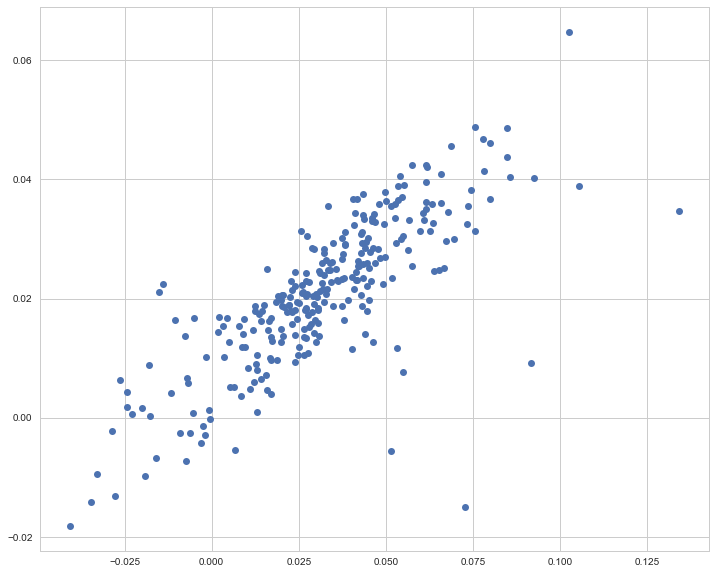

In [10]:
# Calculating one year changes

import matplotlib as mpl
import matplotlib.pyplot as plt

Delta_C = []
Delta_Y = []

for t in range(280):
    Delta_C = Delta_C + [(gdp_cons_df.PCECC96[t+4]-
        gdp_cons_df.PCECC96[t])/gdp_cons_df.GDPC1[t]]
    Delta_Y = Delta_Y + [(gdp_cons_df.GDPC1[t+4]-
        gdp_cons_df.GDPC1[t])/gdp_cons_df.GDPC1[t]]

Delta_C = Delta_C + [0] + [0] + [0] + [0]
Delta_Y = Delta_Y + [0] + [0] + [0] + [0]

gdp_cons_df['Delta_C'] = Delta_C
gdp_cons_df['Delta_Y'] = Delta_Y

print(gdp_cons_df.head())

plt.plot(gdp_cons_df.Delta_Y[:280], gdp_cons_df.Delta_C[:280], "o")

In [12]:
# 1 year changes regression: full sample

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

Delta_Consumption = gdp_cons_df.Delta_C[:280]
Delta_Income = gdp_cons_df.Delta_Y[:280]
Delta_Income = sm.add_constant(Delta_Income)
results = sm.OLS(Delta_Consumption, Delta_Income).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Delta_C   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     446.1
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           9.78e-60
Time:                        15:20:35   Log-Likelihood:                 961.08
No. Observations:                 280   AIC:                            -1918.
Df Residuals:                     278   BIC:                            -1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.001     11.831      0.0

In [ ]:
# Task G answers

c_y_1_year =
c_y_1_year_early_sample = 
c_y_1_year_late_sample = 

In [ ]:
import numpy as np
ok.grade('q04')

----

&nbsp;

**(Task H) Consumption Function III**

Task F produced a very high estimate of the marginal propensity to consume out of disposable income, MPC, $ c_y $, indicating that households do not smooth spending very much at all—that they take virtually all of a change in their income and spend it. This estimate captures the MPC in response to permanent, long run changes in actual and expected income. But the MPC that is relevant for business cycle analysis is a short run MPC: the response of consumption to surprise, transitory changes in national income.

Task G produed somewhat smaller estimates of the MPC by looking at the reaction of consumption spending to one-year changes in national income.

Now let us look at one quarter changes. We do this by performing a regression analysis in which the dependent and independent variables are oen quarter changes in those variables scaled by the then-current level of real national income.

1. Run the code cell below "Calculating one quarter changes", which calculates and then plots one year changes in consumption spending C and national income Y, both of them as fractions of the then-current level of national income Y. Examine the plot. Email me at delong@econ.berkeley.edu with the subject line "Econ 101b S2018 PS8: Delta_C and Delta_Y DO Not Look Right" if anything looks wrong to you.
2. Run the code cell further below "1 quarter changes regression: full sample". Use the estimated b coefficient—the number immediately to the right of the "Delta_Y" under the heading "coef"—to calculate the estimate of the MPC $ c_y $ produced from examining one year changes. Assume once again that the tax rate t is 0.25. In the code cell "Task G answers", set the variable c_y_1_quarter equal to the estimate of the MPC.
3. Duplicate the code cell "Calculating one quarter changes". Then paste it immediately below. Alter the first line of the pasted version to read "# Calculating one quarter changes: earlier half of the sample"
4. Change the code in "# Calculating one quarter changes: earlier half of the sample" so that it runs the regression analysis for 1 year changes for only the first half of our 280 observation-long post-WWII data. In the code cell "Task G answers", set the variable c_y_1_quarter_early_sample equal to the estimate of the MPC for the first half of the sample.
5. Duplicate the code cell "Calculating one quarter changes". Then paste it immediately below. Alter the first line of the pasted version to read "# Calculating one quarter changes: later half of the sample"
6. Change the code in "# Calculating one quarter changes: later half of the sample" so that it runs the regression analysis for 1 year changes for only the seconc half of our 280 observation-long post-WWII data. In the code cell "Task G answers", set the variable c_y_1_quarter_late_sample equal to the estimate of the MPC for the second half of the sample.

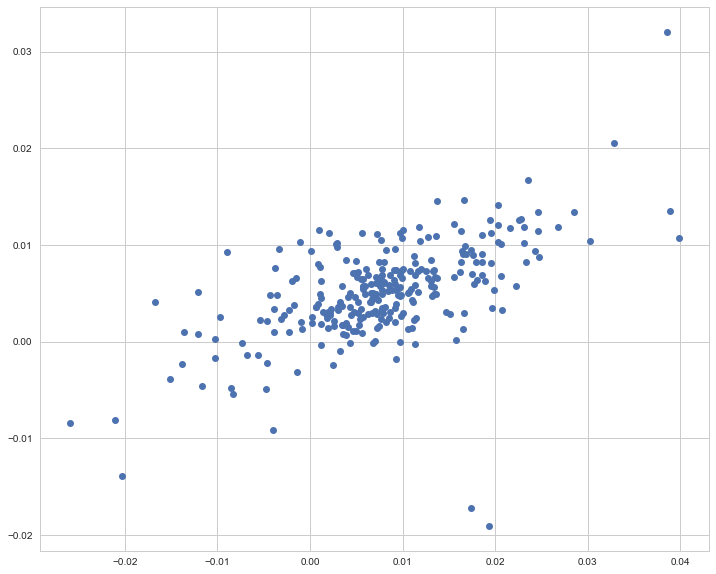

In [13]:
# Calculating one quarter changes
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt

Delta_C1 = []
Delta_Y1 = []

for t in range(280):
    Delta_C1 = Delta_C1 + [(gdp_cons_df.PCECC96[t+1]-
        gdp_cons_df.PCECC96[t])/gdp_cons_df.GDPC1[t]]
    Delta_Y1 = Delta_Y1 + [(gdp_cons_df.GDPC1[t+1]-
        gdp_cons_df.GDPC1[t])/gdp_cons_df.GDPC1[t]]

Delta_C1 = Delta_C1 + [0] + [0] + [0] + [0]
Delta_Y1 = Delta_Y1 + [0] + [0] + [0] + [0]

gdp_cons_df['Delta_C1'] = Delta_C1
gdp_cons_df['Delta_Y1'] = Delta_Y1

plt.plot(gdp_cons_df.Delta_Y1[:280], gdp_cons_df.Delta_C1[:280], "o")

In [14]:
# 1 quarter changes regression: full sample

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

Delta_C1 = gdp_cons_df.Delta_C1[:280]
Delta_Y1 = gdp_cons_df.Delta_Y1[:280]
Delta_Y1 = sm.add_constant(Delta_Y1)
results = sm.OLS(Delta_Consumption, Delta_Income).fit()

results = sm.OLS(Delta_C1, Delta_Y1).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Delta_C1   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     148.0
Date:                Fri, 06 Apr 2018   Prob (F-statistic):           1.40e-27
Time:                        15:22:50   Log-Likelihood:                 1143.2
No. Observations:                 280   AIC:                            -2282.
Df Residuals:                     278   BIC:                            -2275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.000      8.562      0.0

In [ ]:
# Task H answers

c_y_1_quarter =
c_y_1_quarter_early_sample =
c_y_1_quarter_late_sample =

**(Task B) Demographic Transtion**

How much of a difference successfully passing through the demographic transition makes for an economy depends critically on the value of the production function parameter $ \alpha $. A high value makes the demographic burdens of rapid population and labor force growth extremely expensive for an economy.

Recall our steady-state balanced growth path equations for the Solow growth model:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{K}{Y}\right)^* =
\frac{s}{n+g+\delta} $

and:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right)^* =
{\left(\frac{K}{Y}\right)^*}
^\left(\frac{\alpha}{1-\alpha}\right)
E $

Assume s = 15%, g = 2% per year, $ \delta $ = 3% per year, the initial pre-transion $ n_{ini} $ = 3% per year, the alternative post-transition $ n_{alt} $ = 0% per year. Calculate the quotient of output per worker along the steady state balanced growth path for the alternative post-transition scenario divided by output per worker for the iniital pre-transition scenario for the following value of $ \alpha $:

* $ \alpha $ = 0.2
* $ \alpha $ = 0.4
* $ \alpha $ = 0.6
* $ \alpha $ = 0.8

Assign your calculated values to the appropriate variables in the Code Cell for Answers for Task (B) below

In [ ]:
# Code Cell for Answers for Task B

quotientalpha2 =
quotientalpha4 =
quotientalpha6 =
quotientalpha8 =

In [ ]:
import numpy as np
ok.grade('q01')

----

&nbsp;

**(Task C) Cross-Country Productivity Differences I**

Consider a Solow growth model economy with a capital accumulation rate that depends on the relative price of capital goods $ p_k $, because a lower price of capital goods means that a similar amount of savings sY will translate into more investment in capital, thus:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d\left(ln(K)\right)}{dt} = 
\left(\frac{s}{p_k}\right)\left(\frac{Y}{K}\right) - \delta $

in which the relative price of capital goods is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ p_k = \left(\frac{Y}{L}\right)^{-\eta} $

with $ \eta $ being the Greek letter called "eta".

The steady-state balanced-growth path capital-output ratio would then be:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{K}{Y}\right)^* =
\frac{s/p_k}{n+g+\delta} $

and output per worker along the steady-state balanced-growth path would then be:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \left(\frac{Y}{L}\right)^* =
\left(\frac{s/p_k}{n+g+\delta}\right)
^{\frac{\alpha}{1-\alpha}}
E $

In this environment—in which high levels of the effiency of labor and output per worker carry with them a reduction in the relative price of capital goods—we seek to analyze what difference this dependence of the price of capita on prosperity makes. For this question, assume further that the economy's capital-output ratio and output per worker level is on its balanced growth path. And assume for this Task that the current level of the efficiency of labor E is equal to 1.

----

(1) Let the savings rate s=18%, the labor force growth rate n = 1% per year, the labor efficiency growth rate g = 2% per year, the depreciation rate $ \delta $ = 3% per year, and the production function parameter $ \alpha $ = 1/2.

(a) what is current balanced-growth path output per worker if $ \eta = 0 $? Set the variable YoLbg20 equal to your answer in the Code Cell for Answers for Task (C) below.

(b) what is current balanced-growth path output per worker if $ \eta = 0.1 $? Set the variable YoLbg21 equal to your answer in the Code Cell for Answers for Task (C) below.

(c) what is current balanced-growth path output per worker if $ \eta = 0.2 $? Set the variable YoLbg22 equal to your answer in the Code Cell for Answers for Task (C) below.

(d) what is current balanced-growth path output per worker if $ \eta = 0.3 $? Set the variable YoLbg23 equal to your answer in the Code Cell for Answers for Task (C) below.

(e) what is current balanced-growth path output per worker if $ \eta = 0.4 $? Set the variable YoLbg24 equal to your answer in the Code Cell for Answers for Task (C) below.

(f) what is current balanced-growth path output per worker if $ \eta = 0.5 $? Set the variable YoLbg25 equal to your answer in the Code Cell for Answers for Task (C) below.

----

(2) Let the savings rate s=18%, the labor force growth rate n = 1% per year, the labor efficiency growth rate g = 2% per year, the depreciation rate $ \delta $ = 3% per year, and the production function parameter $ \alpha $ = 3/4.

(a) what is current balanced-growth path output per worker if $ \eta = 0 $? Set the variable YoLbg30 equal to your answer in the Code Cell for Answers for Task (C) below.

(b) what is current balanced-growth path output per worker if $ \eta = 0.1 $? Set the variable YoLbg31 equal to your answer in the Code Cell for Answers for Task (C) below.

(c) what is current balanced-growth path output per worker if $ \eta = 0.2 $? Set the variable YoLbg32 equal to your answer in the Code Cell for Answers for Task (C) below.

----

(3) Is this method—take the Solow model balanced growth path and assume that the economy is going to be on it—a reasonable way to proceed in analyzing the question of how much difference an association of prosperity with low capital goods prices make? How might it lead to wrong conclusions? How would you test whether thoe conclusions are wrong? Write your answer in the Markdown Cell for Answers to Task C below.

In [ ]:
# Code Cell for Answers for Task C

YoLbg20 =   # (1)(a)
YoLbg21 =   # (1)(b)
YoLbg22 =   # (1)(c)
YoLbg23 =   # (1)(d)
YoLbg24 =   # (1)(e)
YoLbg25 =   # (1)(f)

YoLbg30 =   # (1)(a)
YoLbg31 =   # (1)(b)
YoLbg32 =   # (1)(c)

### Markdown Cell for Answer to Task C(3)

&nbsp;

ANSWER:<font color="blue"> </font>

In [ ]:
import numpy as np
ok.grade('q02')

----

&nbsp;

**(Task D) Cross-Country Productivity Differences II**

Consider an economy with a capital accumulation rate that depends on the relative price of capital goods $ p_k $ thus:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{d\left(ln(K)\right)}{dt} = 
\left(\frac{s}{p_k}\right)\left(\frac{Y}{K}\right) - \delta $

in which the relative price of capital goods is a function of the efficiency of labor:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ p_k = E^{-\eta} $

and which has an initial efficiency of labor $ E_0 $, an initial capital-output ratio $ K_0/Y_0 $, a constant efficiency of labor growth rate g, a constant population growth rate n, and a production function:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
$ \frac{Y}{L} = \left(\frac{K}{Y}\right)^{\frac{\alpha}{1-\alpha}}E $

The code cell below contains a small program to simulate this model for different parameter values and initial conditions. It is initially set up with:

* s = 0.18
* g = 0.02
* n = 0.01
* $ \delta = 0.03 $
* $ \eta = 0.0 $
* $ \alpha = 1/3 $
* $ L_0 = 1 $
* $ E_0 = 1 $
* $ \frac{K_0}{Y_0} = 3

Run the cell to check that it is working. Then alter the code to consider the cases:

* $ \eta = 0.0 $
* $ \eta = 0.2 $
* $ \eta = 0.4 $
* $ \eta = 0.6 $

Examine the results. Assign the appropriate values for output per worker and the capital-output ratio in the hundredth year of the simulation in the code cell "Code Cell fo rAnswers for Task D" further below. 

In [ ]:
# Code cell for simulation for Task (D)

# check to see if libraries are in the current kernel
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

# simulation length
T = 100

# parameters
s = 0.18
g = 0.02
n = 0.01
delta = 0.03
eta = 0.6
alpha = 1/3

# initial conditions
L_0 = 1
E_0 = 1
KoY_0 = 3


sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
    'Efficiency',
    'Capital',
    'Output',
    'Output_per_Worker',
    'Capital_Output_Ratio',
    'Price_of_Capital'],
    dtype='float')

sg_df.Labor[0] = L_0
sg_df.Efficiency[0] = E_0
sg_df.Price_of_Capital[0] = sg_df.Efficiency[0]**(-eta)
sg_df.Capital_Output_Ratio[0] = KoY_0
sg_df.Output_per_Worker[0] = (sg_df.Capital_Output_Ratio[0]**(alpha/(1-alpha)) *
                             sg_df.Efficiency[0])
sg_df.Output[0] = sg_df.Output_per_Worker[0] * sg_df.Labor[0]
sg_df.Capital[0] = sg_df.Output[0] * sg_df.Capital_Output_Ratio[0]

for i in range(T):
    sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n))
    sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g))
    sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp(s
        *sg_df.Output[i]/(sg_df.Capital[i]*sg_df.Price_of_Capital[i]) - 
        delta))
    sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
        (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
    sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
    sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
        sg_df.Output[i+1])
    sg_df.Price_of_Capital[i+1] = sg_df.Efficiency[i+1]**(-eta)

fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(2,3,1)
sg_df.Labor.plot(ax = ax1, title = "Labor Force")
plt.ylabel("Values")
plt.ylim(0, )

ax2 = plt.subplot(2,3,2)
sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
plt.ylim(0, )
    
ax3 = plt.subplot(2,3,3)
sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
plt.ylim(0, )

ax4 = plt.subplot(2,3,4)
sg_df.Output.plot(ax = ax4, title = "Output")
plt.ylim(0, )
plt.xlabel("Years")
plt.ylabel("Values")

ax5 = plt.subplot(2,3,5)
sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
plt.xlabel("Years")
plt.ylim(0, )

ax6 = plt.subplot(2,3,6)
sg_df.Capital_Output_Ratio.plot(ax = ax6, 
    title = "Capital-Output Ratio")
plt.xlabel("Years")
plt.ylim(0, )

plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

plt.show()

In [ ]:
# Code Cell for Answers for Task D

YoL100eta0 = 
YoL100eta2 =
YoL100eta4 =
YoL100eta6 =

KoY100eta0 =
KoY100eta2 =
KoY100eta4 =
KoY100eta6 =

In [ ]:
import numpy as np
ok.grade('q03')

----

&nbsp;

**(Task E) Cross-Country Productivity Differences III**

As we said in lecture, it is a scandal that the world today is so unequal—so much more unequal than it was two centuries ago—and that 1.5 billion out of our 7 billion or so fellow human beings still live lives not all that distinguishable from those of our pre-Industrial Revolution ancestors, and only 1 billion or so participate fully in the wealth of today's Global North.

The bare Solow growth model does not do a good job of accounting for this "Divergence, Big Time". With the standard estimate of the production function parameter $ \alpha = 1/3 $ and with the presumption that the efficiency of labor E is principally determined by ideas about technology and organization that can be easily communicated and learned, the underlying bias of the Solow growth model is toward one of anticipating relatively rapid economic convergence to Global North productivity levels. That has not happened.

This problem set has indicated two modifications to the Solow model that have some promise for explaining some of the "Divergence, Big Time" that characterizes our world: the demographic burdens placed on emerging markets that are still undergoing pre-Demographic Transition rapid population growth, and the association of a high efficiency of labor with a relative price structure that makes boosting productivity through investment easy.

In the appropriate space in "Markdown Cell for Answer to Task E" below, write an essay of about 250 words indicating what you think would be possibly fruitful directions to further extend and modify the Solow growth model so that it can teach us more about why today's economic world is such an unequal place.

----

&nbsp;

### Markdown Cell for Answer to Task E

&nbsp;

ANSWER:<font color="blue"> </font>

**(Task B) Savings and Investment**

_Would an increase in the saving and investment share of U.S. total output raise or lower output per worker growth and living standards? Double-click on this markdown cell and write your answer below:_

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

**(Task C) Escape from the Malthusian Trap**

_Suppose somebody who hasn’t taken any economics courses asks you why humanity escaped from the Malthusian trap of very low standards of living and slow popula  tion growth rates, which nevertheless put pressure on available natural resources and kept output per worker from rising, in which humanity found itself between 8000 BC and AD 1800. What answer would you give? Double-click on this markdown cell and write your answer below:_

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

**(Task D) Zero Population Growth**

Many observers project that by the end of the twenty-first century the population of the United States will be stable. Using the Solow growth model, what would such a downward shift in the growth rate of the labor force do to the growth of output per worker and to the growth of total output if zero labor force growth came suddenly and permanently in 2050? Consider both the effect on the balanced-growth equilibrium path and the transition from the “old” positive population growth to the “new” zero population growth balanced-growth path.

Answer this question by setting the appropriate variables to their values in the code cell below. The initial balanced growth path steady state of the economy has:

* Rate of population growth n = 1% per year
* Rate of efficiency-of-labor growth g = 1.5% per year
* Depreciation rate $ \delta $ (delta) = 3% per year
* Savings-investment effort as a share of output s = 22% per year
* Diminishing returns to investment production function parameter $ \alpha $ (alpha) = 0.5
* Level of the efficiency of labor today $ E_{2018} = 65000 $

In [ ]:
Output_per_worker2050 =
Output_per_worker2100 =
Output_per_worker2150 =
Capital_output_ratio2050 =
Capital_output_ratio2100 =
Capital_output_ratio2150 =

In [ ]:
ok.grade('q01')

----

&nbsp;

**(Task E) Savings and Investment**

_Suppose somebody who hasn’t taken any economics courses asks you why some countries are so very, very much poorer than others in the world today. What an  swer would you give? Double-click on this markdown cell and write your answer below:_

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

**(Task F) Long Run Human Populations: Levels and Growth**

Run the code cell below, unchanged, to enter Michael Kremer's data—his estimates of human population and its growth, updated to 2015, into the pandas dataframe "Pop_df". Then proceed to do the tasks in the markdown cells further down:

In [7]:
# HUMAN POPULATION OVER THE LAST 10000 YEARS
#
# make sure the standard libraries are active

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

Population = (
    [-8000,5],
    [-4000, 7],
    [-2000, 27],
    [-1000, 50],
    [-500, 100],
    [-200, 150],
    [0, 170],
    [200, 190],
    [400, 190],
    [600, 200],
    [800, 230],
    [1000, 265],
    [1200, 360],
    [1400, 350],
    [1500, 425],
    [1600, 545],
    [1700, 610],
    [1750, 720],
    [1800, 900],
    [1850, 1200],
    [1875, 1325],
    [1900, 1625],
    [1925, 1875],
    [1950, 2516],
    [1975, 4000],
    [2000, 6100],
    [2015, 7250])

In [8]:
Population = np.array(Population)

In [9]:
Pop_df = pd.DataFrame(Population) 

In [10]:
Pop_df.columns = ['Date', 'Population']

In [11]:
Pop_df['Year'] = 0.0

for i in range(26):
    Pop_df.Year[i] = Pop_df.Date[i]
    

/Users/delong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
Pop_df = Pop_df.set_index('Date')

Now let us compare growth rates of human populations across different time periods. Set the variables in the code cell below to their appropriate values:

In [ ]:
Growth_Rate_1000BC_to_1000AD =
Growth_Rate_1400_to_1600 =
Growth_Rate_1900_to_1950 =

In [ ]:
ok.grade('q03')

Now suppose that we are in a Malthusian population régime, in which the rate of population growth is linearly proportional to the relative deviation of typical standards of living from 750 dollars a year, with population growth at zero when output per capita is 750 dollars per year and 1 percent per year when output per worker is 1500. What would you think typical standards of living were in the 1400 to 1600 period and the in the 1900 to 1950 period? Enter the appropriate values for the variables in the code cell below:

In [ ]:
SoLtypical1400to1600 =
SoLtypical1900to1950 =

In [ ]:
ok.grade('q04')

----

&nbsp;

**(Task G) American and British Economic Growth**

Run the code cell below, unchanged, to enter Measuring Worth data for the United Kingdom and the United States into the pandas dataframes "uklongrun_df" and "uslongrun_df" and the pandas dictionaries "uklongrun_dict" and "uslongrun_dict". Then proceed to do the tasks in the markdown cell further down:

In [ ]:
# CODE

# British long run real GDP per capita growth
# From Sam Williamson and Louis Johnston, Measuring Worth
# Data

sourceURL = "http://delong.typepad.com/2018-02-18_ukgdp_1700-2017.csv"
uklongrun_df = pd.read_csv(sourceURL, index_col = 0)

uklongrun_dict = {}
uklongrun_dict["df"] = uklongrun_df
uklongrun_dict["sourceURL"] = sourceURL
uklongrun_dict["sourceDescription"] = "Ryland Thomas and Samuel H. Williamson, 'What Was the Consistent U.K. GDP Then?' MeasuringWorth 2018"   
uklongrun_dict["sourceNotes"] = "http://www.measuringworth.com/ukgdp/"

# ----

# U.S. long run economic growth of real GDP per capita: data cell
# From Sam Williamson and Louis Johnston, Measuring Worth

sourceURL = "http://delong.typepad.com/2018-02-18_usgdp_1790-2016.csv"
uslongrun_df = pd.read_csv(sourceURL, index_col = 0)

uslongrun_dict = {}
uslongrun_dict["df"] = uslongrun_df
uslongrun_dict["sourceURL"] = sourceURL
uslongrun_dict["sourceDescription"] = "Louis Johnston and Samuel H. Williamson, 'What Was the U.S. GDP Then?' MeasuringWorth, 2018"   
uslongrun_dict["sourceNotes"] = "https://www.measuringworth.com/usgdp/"

Now, using the code cell below, plot United Kingdom economic growth in estimated GDP per capita since 1700. And, using the code below that, plot United States economic growth in estimated GDP per capita since 1790 What would you say the key dividing points in the past several centuries economic growth have been for both countries? What key breakpoints do they share? What key breakpoints are confined to one or the other alone? After running your code and looking at your graphs, double-click on this markdown cell and write your answer below:

&nbsp;

<font color="blue">ANSWER: </font>

In [ ]:
# CODE

In [ ]:
# CODE

**(Task H) Malthusian Economies**

Below we have a function code cell that performs a simulation for the Malthusian economy discussed in lecture and in §5.1 of the DRAFT 3rd edition of DeLong and Olney: _Macroeconomics_, with an interact link to the texbook file at: <http://datahub.berkeley.edu/user-redirect/interact?account=braddelong&repo=LSS18E101b&branch=master&path=m%26O3ed/ch5/2018-02-06_DeLong_and_Olney_Macro_3rd_Ch_5.1%20The%20Reality%20of%20Economic%20Growth-Before%20Modern%20Economic%20Growth.ipynb>

This version of the Malthusian model has:

* _resource scarcity_: labor efficiency E depends on both the stock of ideas H and natural resources per worker N/L
* _Malthusian population response_: up to a point, a higher level of output per worker Y/L calls forth a faster rate of growth of population and the labor force
* _Two heads are better than one_: up to a point, a higher population means a greater proportional growth rate of the ideas stock H
* _Demographic transition_: Population and labor force growth reaches its maximum when output per worker is twice subsistence, and thereafter declines to zero population growth
* _Speed limit on modern economic growth_: the ideas stock H cannot grow faster than 2 percent per year

Run the function code cell below

The code cell after the function code cell presents a baseline run of this simulation, with parameters calibrated to more-or-less reproduce human economic history from the invention of agriculture up to the year 1, running for 800 decades—8000 years from 8000 BC to the year 1 (set in the function call by setting T=801). 

1. Run this second code cell to check that it does indeed track human history, with income per worker in year 1 at about 1700 dollars per year and the labor force in year 1 at about 80 million.

2. Copy and paste the function call code cell, and edit it by altering the "T=" declaration that determines how long the simulation runs for to add more decades in order to track the simulated economy up to the year 2500. When, for these baselien parameter values, does the Industrial Revolution take place?

3. Copy and paste the function call code cell, and edit it by altering the "h=" declaration that determines how ingenious humans are in their economy to make us and our predecessors more ingenious—choose h=0.00012 instead of the baseline h=0.0000805. When, for these parameter values, does the Industrial Revolution take place?

4. Copy and paste the function call code cell, and edit it by altering the "h=" declaration that determines how ingenious humans are in their economy to make us and our predecessors less ingenious—choose h=0.00005 instead of the baseline h=0.0000805. When, for these parameter values, does the Industrial Revolution take place?

Write your answers to (2), (3), and (4) below in this markdown cell:

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

In [ ]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN MALTHUSIAN SIMULATIONS
#
# ADDING IN TWO HEADS ARE BETTER THAN ONE: TECHNOLOGICAL PROGRESS 
# PROPORTIONAL TO POPULATION RAISED TO THE POWER LAMBDA...
# 
# IDEAS GROWTH NEVER GREATER THAN 2% PER YEAR
#
# ADDING IN DEMOGRAPHIC TRANSITION: POPULATION GROWTH SLOWS
# AFTER REAL INCOMES REACH 2000 DOLLARS PER YEAR
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and ini conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its ini
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the ini and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...
#

def sgm_malthus_run(H0=900, N0=2250, gamma=2, L0=2.5, n=0.000442, h=0.0000805, s=0.10, 
    alpha=1/3, delta=0.04, Delta_s=0, Delta_g=0, Delta_n=0, phi=0.01, ybar = 1500,
    lambda_i = 0.5, T = 1001, figure_title = "Ideas: Two Heads Are (Somewhat) Better than One"):

    sg_df = pd.DataFrame(index=range(T),columns=[
        'Year',
        'Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'Ideas',
        'Resources',
        'BGP_ini_Labor',
        'BGP_ini_Eff',
        'BGP_ini_Capital',
        'BGP_ini_Output',
        'BGP_ini_Output_per_Worker',
        'BGP_ini_Capital_Output_Ratio',
        'BGP_alt_Labor',
        'BGP_alt_Eff',
        'BGP_alt_Capital',
        'BGP_alt_Output',
        'BGP_alt_Output_per_Worker',
        'BGP_alt_Capital_Output_Ratio'],
        dtype='float')

    g = (gamma/(1+gamma))*h - (1/(1+gamma))*n
    sg_df.Ideas[0] = H0
    sg_df.Resources[0] = N0
    E0 = sg_df.Ideas[0]**(gamma/(1+gamma))*(sg_df.Resources[0]/L0)**(1/(1+gamma))
    sg_df.Labor[0] = L0
    sg_df.BGP_ini_Labor[0] = L0
    sg_df.BGP_alt_Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.BGP_ini_Eff[0] = E0
    sg_df.BGP_alt_Eff[0] = E0
    KoverY_ini_steady_state = s/(n+g+delta)
    YoverL_ini_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_ini_steady_state = (YoverL_ini_steady_state *
        KoverY_ini_steady_state)
    sg_df.Capital[0] = KoverL_ini_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_ini_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_ini_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_ini_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_ini_Output[0] = sg_df.BGP_ini_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_ini_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_ini_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    
    sg_df.BGP_alt_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_alt_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_alt_Output[0] = sg_df.BGP_alt_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_alt_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    

    for i in range(T):
        if (sg_df.Output_per_Worker[i] < 2*ybar):
            n = phi * np.log(sg_df.Output_per_Worker[i]/ybar)
        else:
            n = phi * np.log(2)*np.exp(-sg_df.Output_per_Worker[i]/(2*ybar) + 1)
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(10*(n + Delta_n)))
        sg_df.Ideas[i+1] = sg_df.Ideas[i]*np.exp(10*min((h*sg_df.Labor[i]**lambda_i), 0.02))
        sg_df.Resources[i+1] = sg_df.Resources[i]
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp(10*(s+Delta_s)/ 
            KoverY_current - 10*delta))
        
        sg_df.Efficiency[i+1] = (sg_df.Ideas[i+1]**(gamma/(1+gamma)) * 
            (sg_df.Resources[i+1]/sg_df.Labor[i+1])**(1/(1+gamma)))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])
        
        sg_df.BGP_ini_Labor[i+1] = (sg_df.BGP_ini_Labor[i] * np.exp(n))
        sg_df.BGP_ini_Eff[i+1] = (sg_df.BGP_ini_Eff[i] * np.exp(g))
        sg_df.BGP_ini_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_ini_Output_per_Worker[i+1] = sg_df.BGP_ini_Eff[i+1] * (
            sg_df.BGP_ini_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_ini_Output[i+1] = (sg_df.BGP_ini_Output_per_Worker[i+1] * 
            sg_df.BGP_ini_Labor[i+1])
        sg_df.BGP_ini_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_ini_Eff[i+1] * sg_df.BGP_ini_Labor[i+1])
        
        sg_df.BGP_alt_Labor[i+1] = (sg_df.BGP_alt_Labor[i] * np.exp(n+ Delta_n))
        sg_df.BGP_alt_Eff[i+1] = (sg_df.BGP_alt_Eff[i] * np.exp(g+ Delta_g))
        sg_df.BGP_alt_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_alt_Output_per_Worker[i+1] = sg_df.BGP_alt_Eff[i+1] * (
            sg_df.BGP_alt_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_alt_Output[i+1] = (sg_df.BGP_alt_Output_per_Worker[i+1] * 
            sg_df.BGP_alt_Labor[i+1])
        sg_df.BGP_alt_Capital[i+1] = ((s + Delta_s) / (n + Delta_n + 
            g + Delta_g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_alt_Eff[i+1] * sg_df.BGP_alt_Labor[i+1])
    
    sg_df.Year = range(-8000, -8000 + 10*T, 10)
    
    sg_df = sg_df.set_index('Year')
        
    fig = plt.figure(figsize=(12, 9))

    ax1 = plt.subplot(2,3,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax2 = plt.subplot(2,3,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(2,3,3)
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylim(0, )

    ax4 = plt.subplot(2,3,4)
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylabel("Values")
    plt.xlabel("Years")
    plt.ylim(0, )

    ax5 = plt.subplot(2,3,5)
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylim(0, )

    ax6 = plt.subplot(2,3,6)
    sg_df.Capital_Output_Ratio.plot(ax = ax6, 
        title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, 6)

    plt.suptitle(figure_title, size = 20)

    plt.show()
    
    print(n + Delta_n, "is the labor force growth rate")
    print(g + Delta_g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s + Delta_s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")
    print(" ")
    print(sg_df.Labor[0], "is the labor force in year 0")
    print(sg_df.Output_per_Worker[0], "is output per worker in year 0")
    print(" ")
    

In [ ]:
sgm_malthus_run(T=801, figure_title = "Demographic Transition", 
    h=0.0000805, phi=0.01, ybar = 1500)

**(Task B) Getting a Sense of How the Solow Growth Model Behaves Via Simulation**

We start out with us giving you two functions:

    sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24,
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)

calculating and plotting levels of Solow growth model variables, and:

    log_sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)

calculating and plotting the logarithms of Solow growth model variables.
    
Required arguments are the initial level of the labor force, L0, the first argument of the function, and the initial level of the efficiency of labor, E0, the second argument of the
function.

Optional arguments are the curvature of the production function parameter alpha (or $ \alpha $), the depreciation rate delta (or $ \delta $), and the time T for which the simulation is to be run; plus:

* the value of labor force growth n for the initial balanced-growth path that the economy is on, and the value Delta_n (or $ {\Delta}n $) of the differential between the initial and the final (if we are considering a jump in n that takes place over time) or the alternative (if we are considering an alternative scenario, an alternate world, with a different value of n);   
&nbsp;

* the value of efficiency of labor growth g for the initial balanced-growth path that the economy is on, and the value Delta_g (or $ {\Delta}g $) of the differential between the initial and the final (if we are considering a jump in g that takes place over time) or the alternative (if we are considering an alternative scenario, an alternate world, with a different value of g);   
&nbsp;

* the value of the savings-investment share s for the initial balanced-growth path that the economy is on, and the value Delta_s (or $ {\Delta}s $) of the differential between the initial and the final (if we are considering a jump in s that takes place over time) or the alternative (if we are considering an alternative scenario, an alternate world, with a different value of s);   
&nbsp;

If optional arguments are not given, then they take on their default values:

* Zero for three Deltas (or $ \Delta $s), Delta_s, Delta_n, and Delta_g ($ {\Delta}s, {\Delta}n, {\Delta}g) $.
* n=0.01, g=0.02, s=0.24
* T = 100
* ($ \alpha $) alpha=0.5, ($ \delta $) delta=0.03

Check the functions, run the base cases with the two percentage point boost to annual labor force growth Delta_n = 0.02 ($ {\Delta}n = 0.02 $) and report any bugs you find.

Then go on to the descriptions and tasks further down...

In [ ]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN SIMULATIONS
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its initial
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the initial and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...

def sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_initial_Output',
        'BGP_initial_Output_per_Worker',
        'BGP_initial_Capital_Output_Ratio',
        'BGP_initial_Capital',
        'BGP_final_Output',
        'BGP_final_Output_per_Worker',
        'BGP_final_Capital_Output_Ratio',
        'BGP_final_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    KoverY_initial_steady_state = s/(n+g+delta)
    YoverL_initial_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_initial_steady_state = (YoverL_initial_steady_state *
        KoverY_initial_steady_state)
    sg_df.Capital[0] = KoverL_initial_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_initial_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_initial_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_initial_Output[0] = sg_df.BGP_initial_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_initial_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    
    sg_df.BGP_final_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_final_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_final_Output[0] = sg_df.BGP_final_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_final_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    

    for i in range(T):
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])
        
        sg_df.BGP_initial_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_initial_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_initial_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_initial_Output[i+1] = (sg_df.BGP_initial_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_initial_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
        sg_df.BGP_final_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_final_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_final_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_final_Output[i+1] = (sg_df.BGP_final_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_final_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")
    plt.ylim(0, )

    ax2 = plt.subplot(3,2,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(3,2,3)
    sg_df.BGP_initial_Capital.plot(ax = ax3, title = "BGP (Initial) Capital Stock")
    sg_df.BGP_final_Capital.plot(ax = ax3, title = "BGP (Final) Capital Stock")
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax4 = plt.subplot(3,2,4)
    sg_df.BGP_initial_Output.plot(ax = ax4, title = "BGP (Initial) Output")
    sg_df.BGP_final_Output.plot(ax = ax4, title = "BGP (Final) Output")
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylim(0, )

    ax5 = plt.subplot(3,2,5)
    sg_df.BGP_initial_Output_per_Worker.plot(ax = ax5, title = "BGP (Initial) Output per Worker")
    sg_df.BGP_final_Output_per_Worker.plot(ax = ax5, title = "BGP (Final) Output per Worker")
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(3,2,6)
    sg_df.BGP_initial_Capital_Output_Ratio.plot(ax = ax6, 
        title = "BGP (Initial) Capital-Output Ratio")
    sg_df.BGP_final_Capital_Output_Ratio.plot(ax = ax6, 
        title = "BGP (Final) Capital-Output Ratio")
    sg_df.Capital_Output_Ratio.plot(ax = ax6, 
        title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n + Delta_n, "is the labor force growth rate")
    print(g + Delta_g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s + Delta_s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")

In [ ]:
# Now let's see how this works in a base case, and with the labor
# force growth rate boosted by 2% per year in the alternative case...

sgm_bgp_100yr_run(L0 = 1000, E0 = 1, Delta_n = 0.02)

In [ ]:
# FUNCTION FOR CALCULATING AND GRAPHING THE LOGS OF OF SOLOW GROWTH 
# MODEL VARIABLES IN THE SIMULATIONS 
#
# might as well put "check that common libraries are active" as a default header
# in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its initial
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the initial and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...

def log_sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'BGP_initial_Output',
        'BGP_initial_Output_per_Worker',
        'BGP_initial_Capital_Output_Ratio',
        'BGP_initial_Capital',
        'BGP_final_Output',
        'BGP_final_Output_per_Worker',
        'BGP_final_Capital_Output_Ratio',
        'BGP_final_Capital'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    KoverY_initial_steady_state = s/(n+g+delta)
    YoverL_initial_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_initial_steady_state = (YoverL_initial_steady_state *
        KoverY_initial_steady_state)
    sg_df.Capital[0] = KoverL_initial_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_initial_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_initial_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_initial_Output[0] = sg_df.BGP_initial_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_initial_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_initial_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    
    sg_df.BGP_final_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_final_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_final_Output[0] = sg_df.BGP_final_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_final_Capital[0] = sg_df.Labor[0] * sg_df.Efficiency[0] * (
        sg_df.BGP_final_Capital_Output_Ratio[0]*(1/(1 - alpha)))
    

    for i in range(T):
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])
        
        sg_df.BGP_initial_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_initial_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_initial_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_initial_Output[i+1] = (sg_df.BGP_initial_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_initial_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
        sg_df.BGP_final_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_final_Output_per_Worker[i+1] = sg_df.Efficiency[i+1] * (
            sg_df.BGP_final_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_final_Output[i+1] = (sg_df.BGP_final_Output_per_Worker[i+1] * 
            sg_df.Labor[i+1])
        sg_df.BGP_final_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])
        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(3,2,1)
    np.log(sg_df.Labor).plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Parameters")
    plt.ylim(0, )

    ax2 = plt.subplot(3,2,2)
    np.log(sg_df.Efficiency).plot(ax = ax2, title = "Efficiency of Labor")
    plt.ylim(0, )
    
    ax3 = plt.subplot(3,2,3)
    np.log(sg_df.BGP_initial_Capital).plot(ax = ax3, title = "BGP (Initial) Capital Stock")
    np.log(sg_df.BGP_final_Capital).plot(ax = ax3, title = "BGP (Final) Capital Stock")
    np.log(sg_df.Capital).plot(ax = ax3, title = "Capital Stock")
    plt.ylabel("Values")
    plt.ylim(0, )

    ax4 = plt.subplot(3,2,4)
    np.log(sg_df.BGP_initial_Output).plot(ax = ax4, title = "BGP (Initial) Output")
    np.log(sg_df.BGP_final_Output).plot(ax = ax4, title = "BGP (Final) Output")
    np.log(sg_df.Output).plot(ax = ax4, title = "Output")
    plt.ylim(0, )

    ax5 = plt.subplot(3,2,5)
    np.log(sg_df.BGP_initial_Output_per_Worker).plot(ax = ax5, title = "BGP (Initial) Output per Worker")
    np.log(sg_df.BGP_final_Output_per_Worker).plot(ax = ax5, title = "BGP (Final) Output per Worker")
    np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")
    plt.ylabel("Ratios")
    plt.ylim(0, )

    ax6 = plt.subplot(3,2,6)
    np.log(sg_df.BGP_initial_Capital_Output_Ratio).plot(ax = ax6, 
        title = "BGP (Initial) Capital-Output Ratio")
    np.log(sg_df.BGP_final_Capital_Output_Ratio).plot(ax = ax6, 
        title = "BGP (Final) Capital-Output Ratio")
    np.log(sg_df.Capital_Output_Ratio).plot(ax = ax6, 
        title = "Capital-Output Ratio")
    plt.xlabel("Years")
    plt.ylim(0, )

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n + Delta_n, "is the labor force growth rate")
    print(g + Delta_g, "is the efficiency of labor growth rate")
    print(delta, "is the depreciation rate")
    print(s + Delta_s, "is the savings rate")
    print(alpha, "is the decreasing-returns-to-scale parameter")

In [ ]:
# Now let's see how this works in a base case, and with the labor
# force growth rate boosted by 2% per year in the alternative case...

log_sgm_bgp_100yr_run(L0 = 1000, E0 = 1, Delta_n = 0.02)

Now insert code cells between this markdown cell and the "# Task B answer variables" code cell. In them, run three simulations—logs and levels—in each of them, respectively, boosting one of the savings rate, the efficiency of labor growth rate, and the labor force growth rate by one percentage point over their default values in the function. 

Also calculate the values of log(K/Y) in the 50th year of the simulation for each of your three simulations. In the "# Task B answer variables" code cell, set the variables equal to their values in your three respective simulation runs. In the "Task B Answer Description" markdown cell, write two paragraphs telling us what you find out about the effects of these different changes in the economic environment on a Solow growth model economy from these simulation runs:

In [ ]:
# Task B answer variables

KoverY_50_splus = __ # In the simulation run boosting the savings rate, the value of 
                     # the capital output ratio in the 50th year goes here

KoverY_50_nplus = __ # In the simulation run boosting the labor force growth rate, the
                     #  value of the capital output ratio in the 50th year goes here

KoverY_50_gplus = __ # In the simulation run boosting the efficiency of labor growth
                     # rate, the log value of the capital output ratio in the 50th year 
                     # goes here

**Task B Answer Discussion**:



In [ ]:
ok.grade('q01')

----

&nbsp;

**(Task C): Different Values of the Production Function Parameter $\alpha$**

Still working with our two simulation functions:

    sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24,
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)
    
and:

    log_sgm_bgp_100yr_run(L0, E0, n=0.01, g=0.02, s=0.24, 
    alpha=0.5, delta=0.03, Delta_s=0, Delta_g=0, Delta_n=0, 
    T = 100)
    
Insert code cells immediately below to calculate—logs and levels—the effect in the Solow growth model, starting from our default base case balanced growth path, of a permanent six percentage point increase in the savings-investment rate s for five different values of the production function curvature parameter alpha ($\alpha$): 1/4, 1/3, 1/2, 2/3, and 3/4. 

Also calculate the values of log(K/Y) in the 50th year of the simulation for each of your  simulations. In the subsequent code cell "Task C answer variables" set the variables equal to their values in your five respective simulation runs.

In the subsequent markdown cell "Task C Answer Discussion", write two paragraphs about what these simulation runs tell you about the differences between economies in which diminishing returns to scale set in quickly (alpha low, near zero), and economies in which diminishing returns set in slowly because capital has a high weight share in the production function (alpha high, near one):

In [ ]:
# Task C answer variables

KoverY_50_alphaquarter = __ # In the simulation run boosting the savings rate 
                            # with alpha=0.25, the value of the capital output
                            # ratio in the 50th year goes here

KoverY_50_alphathird = __ # In the simulation run boosting the savings rate 
                          # with alpha=1/3, the value of the capital output
                          # ratio in the 50th year goes here

KoverY_50_alphahalf = __ # In the simulation run boosting the savings rate 
                         # with alpha=0.5, the value of the capital output
                         # ratio in the 50th year goes here

KoverY_50_alphatwothirds = __ # In the simulation run boosting the savings rate 
                              # with alpha=2/3, the value of the capital output
                              # ratio in the 50th year goes here
        
KoverY_50_alphathreequarters = __ # In the simulation run boosting the savings rate 
                                  # with alpha=3/4, the value of the capital output
                                  # ratio in the 50th year goes here


**Task C Answer Discussion**:
    


In [ ]:
ok.grade('q02')

----

&nbsp;

**(Task D) Graphing the Production Function**

The code cell below calculates and graphs the per-worker version of the production function for alpha = 0.5, E =1. Copy and alter it to calculate the production function for alpha = 0.25, E =2, setting the output variable:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; OPW_quartertwo = output_per_worker[500, 1]. Run it. 

In the subsequent markdown cell, describe the differences between the two cases of the production function.

In [ ]:
alpha = 0.5
E = 1

output_per_worker = np.zeros((501, 2))

for i in range(501):
    lowestkoverl = 0
    output_per_worker[i, 0] = lowestkoverl + 2 * i
    output_per_worker[i, 1] = (output_per_worker[i, 0] ** alpha) * E
output_per_worker_df = DataFrame(data = output_per_worker, 
    columns = ["Capital_per_Worker", "Output_per_Worker"])

output_per_worker_df.set_index('Capital_per_Worker').plot()
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )

str1 = "Production Function:"
str2 = "Output per Worker as a Function of Capital per Worker"
str3 = "for a Constant Value of the Efficiency of Labor"
str4 = "α = 0.5, E = 1"
plt.title(str1 + "\n" + str2 + "\n" + str3 + "\n" + str4, size = 20)

OPW_halfone = output_per_worker[500, 1]

print("Output per worker =", OPW_halfone)

**Task D Answer Discussion**

In [ ]:
ok.grade('q03')

----

&nbsp;

**(Task E): Plotting the Cobb-Douglas Production Function**:

The code cell below plots output per worker for five different values of the production function parameter α, adjusting E for each curve so that the value of output per worker is 40 when the capital-output ratio is 200:

1. Run the cell.
2. Copy the code in the cell. Paste it in a new cell. Alter the code so that it plots the production function for the five different production function parameters, but with the value of output per worker equal to 200 whenever capital per worker is 800.

In [ ]:
E = 40

for a in range(5):
    output_per_worker = np.zeros((501, 2))
    alpha = 0.15 * (a + 1)
    for i in range(501):
        output_per_worker[i, 0] = 2 * i
        output_per_worker[i, 1] = ((output_per_worker[i, 0] ** alpha) * E / 
            ((200) ** alpha) )
    output_per_worker_df = DataFrame(data = output_per_worker, 
        columns = ["Capital_per_Worker", "Output_per_Worker"])

    plt.plot(output_per_worker_df.Capital_per_Worker, output_per_worker_df.Output_per_Worker)
    plt.legend(["α=0.15", "α=0.30", "α=0.45", "α=0.60", "α=0.75"])
    
plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.title("Production Function for Varying α\nHolding f(200) = 40", size = 24)
plt.xlim(0, 1000)
plt.ylim(0, )

In [ ]:
ok.grade('q04')

**(Task F): Calibrating the Model to the U.S. Today**

The code cell below gives parameter values roughly calibrated to the U.S. economy today, and sets two variables—KoverYstarinitial and YoverLstarinitial—equal to the capital/output ratio and output per worker level for the U.S. today along its current balanced growth path. Copy and paste the code cell, and alter it to calculate and print two variables:

    KoverYstarfinal
    YoverLstarfinal
    
equal to their alternative balanced growth path values if the U.S. savings-investment rate had been 2.75 percentage points higher. Then add more code cells calculating new variables:

    KoverYstarinitial_F2
    YoverLstarinitial_F2
    KoverYstarfinal_F2
    YoverLstarfinal_F2

corresponding to a Solow growth model economy with alpha = 1/2 and YoverLstarinitial_F2 = 130000

In [ ]:
# in the U.S. today values are approximately:

n = 0.01
g = 0.015
delta = 0.03

sinitial = 0.22
alpha = 0.333
 
KoverYstarinitial = sinitial/(n + g + delta)

E = 65067.5831863

YoverLstarinitial = KoverYstarinitial**(alpha/(1-alpha)) * E

print(KoverYstarinitial, "= KoverYstarinitial")
print(YoverLstarinitial, "= YoverLstarinitial")

**Task 2: Reversals of Fortune**:

This problem requires you to edit the second Python code cell below. The first cell downloads data and plots Argentinean and Swedish levels of GDP per capita since 1890. Run this first cell. There is no need to change it. Then...


In [ ]:
# time series for measured real national product per capita for 
# Sweden and Argentina since 1890, plus source notes, accessible 
# in the argentina_sweden_dict object for later use, if needed...

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd

sourceURL = "http://delong.typepad.com/2017-08-11-argentina-and-sweden-gdp-per-capita-1890-2015-from-gapminder.org.csv"
argentina_sweden_df = pd.read_csv(sourceURL, index_col = 0)

argentina_sweden_dict = {}
argentina_sweden_dict["df"] = argentina_sweden_df
argentina_sweden_dict["sourceURL"] = sourceURL
argentina_sweden_dict["sourceDescription"] = "Hans Rosling's Gapminder: http://gapminder.org"   
argentina_sweden_dict["sourceNotes"] = "From Gapminder World data page: http://www.gapminder.org/data/"

argentina_sweden_dict["df"].plot()

plt.ylim(0, )
plt.xlabel("Year", size = 15)
plt.ylabel("Real GDP per Capita", size = 15)
plt.title("Swedish and Argentinian Economic Growth since 1890", size = 30)

Then...

2.1: Calculate the year that Sweden surpasses Argentina in GDP per capita. Write code to set the variable Sweden_surpasses equal to that year in the code cell below:

In [ ]:
Sweden_surpasses = 1931

In [ ]:
ok.grade('q01')

2.2: Calculate the growth rates of Swedish and Argentinean GDP per capita, and their difference, over the periods 1890-1914, 1914-1946, 1946-1980, and 1980-2002. Write code to set the appropriate variables equal to the values in the code cell below:

In [ ]:
Swedish_Growth18901914 = ___
Swedish_Growth19141946 = ___
Swedish_Growth19461980 = ___
Swedish_Growth19802002 = ___

Argentinean_Growth18901914 = ___
Argentinean_Growth19141946 = ___
Argentinean_Growth19461980 = ___
Argentinean_Growth19802002 = ___

Difference_Growth18901914 = ___
Difference_Growth19141946 = ___
Difference_Growth19461980 = ___
Difference_Growth19802002 = ___


2.3: Calculate the multiple that Swedish GDP per capita in 2015 is of its level in 1890, the multiple that Argentinean GDP per capita in 2015 is of its level in 1890, and the multiple that the quotient is. Write code to set the appropriate variables equal to the values in the code cell below:

In [ ]:
Sweden_multiple18902015 = ___

Argentina_multiple18902015 = ___

Quotient_multiple18902015 = ___

----

**Task 3: The basics of the Solow growth model**:

In the (markdown) cell below this one, answer the questions asked:

1. What are the _economic variables_ in the Solow growth model? List their symbols, and describe what they are: ANSWER

2. What are the _parameters_ in the Solow growth model? List their symbols, and describe what they are:

3. What are the _behavioral relationships_ in the Solow growth model?

4. What is the _equilibrium condition_ in the Solow growth model?

1. What are the _economic variables_ in the Solow growth model? List their symbols, and describe what they are: <font color='blue'>ANSWER: ___ </font>

2. What are the _parameters_ in the Solow growth model? List their symbols, and describe what they are: <font color='blue'>ANSWER: ___ </font>

3. What are the _behavioral relationships_ in the Solow growth model? <font color='blue'>ANSWER: ___ </font>

4. What is the _equilibrium condition_ in the Solow growth model? <font color='blue'>ANSWER: ___ </font>

----

&nbsp;

**Task 4: Equilibrium Output per Worker Graphically**

The code cell immediately below contains a small program to plot the balanced-growth path output per worker and capital per worker levels graphically for values of the parameters n, g, δ, α, and s, and for the current level of the efficiency of labor E. It is set to calculate for n = 0, g= 0, δ = .03, α = 0.5, s = 0.15, and E = 1.

Alter the inputs to the cell above the line of "# ----" and rerun the cell multiple times, or use some other means of your choosing, to set the variables in the further cells below:

In [ ]:
delta = 0.03
n = 0
g = 0
s = 0.15
alpha = 0.5
E = 1
lowestKoverLconsidered = 0

#----

array = np.zeros((201, 3))

for i in range(201):
    array[i, 0] = lowestKoverLconsidered + i/4
    array[i, 1] = (array[i, 0] 
        ** alpha) * E**(1 - alpha)
    array[i, 2] = ((delta + n + g)/s * array[i, 0] )

capital_and_output_per_worker_df = DataFrame(data = 
    array, columns = ["Capital_per_Worker", "Output_per_Worker", 
    "Equilibrium Condition"])

capital_and_output_per_worker_df.set_index('Capital_per_Worker').plot()

plt.xlabel("Capital per Worker")
plt.ylabel("Output per Worker")
plt.ylim(0, )
plt.title("Balanced Growth Equilibrium Is Where the Curves Cross", size = 20)

In [ ]:
# 4.1 For n = 0, g= 0, δ = .03, α = 0.5, 
# s = 0.15, and E = 1.

YoverL41 = ___
KoverL41 = ___

In [ ]:
ok.grade('q02')

In [ ]:
# 4.2 For n = 0.01, g = 0.01, δ = .03, α = 0.3333, 
# s = 0.25, and E = 2.

YoverL42 = ___
KoverL42 = ___

In [ ]:
# 4.3 For n = 0.01, g= 0.02, δ = .03, α = 0.3333, 
# s = 0.36, and E = 1.

YoverL43 = ___
KoverL43 = ___

In [ ]:
# 4.4 For n = .01, g= 0.02, δ = .03, α = 0.4, 
# s = 0.50, and E = 1.

YoverL44 = ___
KoverL44 = ___

In [ ]:
# 4.5 For n = .01, g= 0.02, δ = .03, α = 0.2, 
# s = 0.50, and E = 1.

YoverL45 = ___
KoverL45 = ___

In [ ]:
# 4.6 For n = .01, g= 0.015, δ = .025, α = 0.33333, 
# s = 0.50, and E = 1

YoverL46 = ___
KoverL46 = ___

In [ ]:
# 4.7 For n = .01, g= 0.015, δ = .025, α = 0.9, 
# s = 0.125, and E = 0.5

YoverL47 = ___
KoverL47 = ___

In [ ]:
# 4.8 For n = .01, g= 0.015, δ = .035, α = 0.75, 
# s = 0.25, and E = 0.5

YoverL48 = ___
KoverL48 = ___

In [ ]:
# 4.9 For n = .01, g= 0.015, δ = .025, α = 0.5, 
# s = 0.5, and E = 0.5

YoverL49 = ___
KoverL49 = ___

----

&nbsp;

**Task 5: The Effects of a Jump in the Savings Rate**:

Do calculations and assign the appropriate values to the variables in the code cells below:

In [ ]:
# when α = 0.15, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles
# as a number: doubling is 2, tripling is 3:

KY_when_s_doubles_pointfifteen = ___

In [ ]:
ok.grade('q03')

In [ ]:
# when α = 0.30, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointthirty = ___

In [ ]:
# when α = 0.45, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointfortyfive = ___

In [ ]:
# when α = 0.60, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointsixty = ___

In [ ]:
# when α = 0.75, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointseventyfive = ___

In [ ]:
# when α = 0.90, the proportional jump in BGP K/Y
# that takes place when the savings rate doubles:

KY_when_s_doubles_pointninety = ___

----

&nbsp;

**Task 6: The Effects of a Jump in the Savings Rate**:

Do calculations and assign the appropriate values to the variables in the code cells below:

In [ ]:
# when α = 0.15, the proportional jump in BGP Y/L
# that takes place when the savings rate doubles
# (as a number: a 50% increase in BGP Y/L is a 1.5):

Y_when_s_doubles_pointfifteen = ___

In [ ]:
ok.grade('q04')

In [ ]:
# when α = 0.30, the proportional jump in BGP Y/L
# that takes place when the savings rate doubles:

Y_when_s_doubles_pointthirty = ___

In [ ]:
# when α = 0.45, the proportional jump in BGP Y/L
# that takes place when the savings rate doubles:

Y_when_s_doubles_pointfortyfive = ___

In [ ]:
# when α = 0.60, the proportional jump in BGP Y/L
# that takes place when the savings rate doubles:

Y_when_s_doubles_pointsixty = ___

In [ ]:
# when α = 0.75, the proportional jump in BGP Y/L
# that takes place when the savings rate doubles:

Y_when_s_doubles_pointseventyfive = ___

In [ ]:
# when α = 0.90, the proportional jump in BGP Y/L
# that takes place when the savings rate doubles:

Y_when_s_doubles_pointninety = ___